# Project - Regression Modeling with the Ames Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Ames Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'ames.csv' as a pandas dataframe

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
ames = pd.read_csv('ames.csv')

subset = ['YrSold', 'MoSold', 'Fireplaces', 'TotRmsAbvGrd', 'GrLivArea',
          'FullBath', 'YearRemodAdd', 'YearBuilt', 'OverallCond', 'OverallQual', 'LotArea', 'SalePrice']

data = ames.loc[:, subset]

The columns in the Ames housing data represent the dependent and independent variables. We have taken a subset of all columns available to focus on feature interpretation rather than preprocessing steps. The dependent variable here is the sale price of a house `SalePrice`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 

### Inspect the columns of the dataset and comment on type of variables present

In [2]:
# Your code here
print(data.describe())
data.head()

            YrSold       MoSold   Fireplaces  TotRmsAbvGrd    GrLivArea  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean   2007.815753     6.321918     0.613014      6.517808  1515.463699   
std       1.328095     2.703626     0.644666      1.625393   525.480383   
min    2006.000000     1.000000     0.000000      2.000000   334.000000   
25%    2007.000000     5.000000     0.000000      5.000000  1129.500000   
50%    2008.000000     6.000000     1.000000      6.000000  1464.000000   
75%    2009.000000     8.000000     1.000000      7.000000  1776.750000   
max    2010.000000    12.000000     3.000000     14.000000  5642.000000   

          FullBath  YearRemodAdd    YearBuilt  OverallCond  OverallQual  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean      1.565068   1984.865753  1971.267808     5.575342     6.099315   
std       0.550916     20.645407    30.202904     1.112799     1.382997   
min       0.000000   195

YrSold  MoSold  Fireplaces  TotRmsAbvGrd  GrLivArea  FullBath  \
0    2008       2           0             8       1710         2   
1    2007       5           1             6       1262         2   
2    2008       9           1             6       1786         2   
3    2006       2           1             7       1717         1   
4    2008      12           1             9       2198         2   

   YearRemodAdd  YearBuilt  OverallCond  OverallQual  LotArea  SalePrice  
0          2003       2003            5            7     8450     208500  
1          1976       1976            8            6     9600     181500  
2          2002       2001            5            7    11250     223500  
3          1970       1915            5            7     9550     140000  
4          2000       2000            5            8    14260     250000

In [3]:
# Observations 
#OverallCond and OverallQual appear to be values of some type of scored value
#There appears to be a few columns that describe aspects of the home and others that are time-based
#In most cases, it appears that the GrLivArea has a direct impact on the salesprice

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

array([[<AxesSubplot:title={'center':'YrSold'}>,
        <AxesSubplot:title={'center':'MoSold'}>,
        <AxesSubplot:title={'center':'Fireplaces'}>],
       [<AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

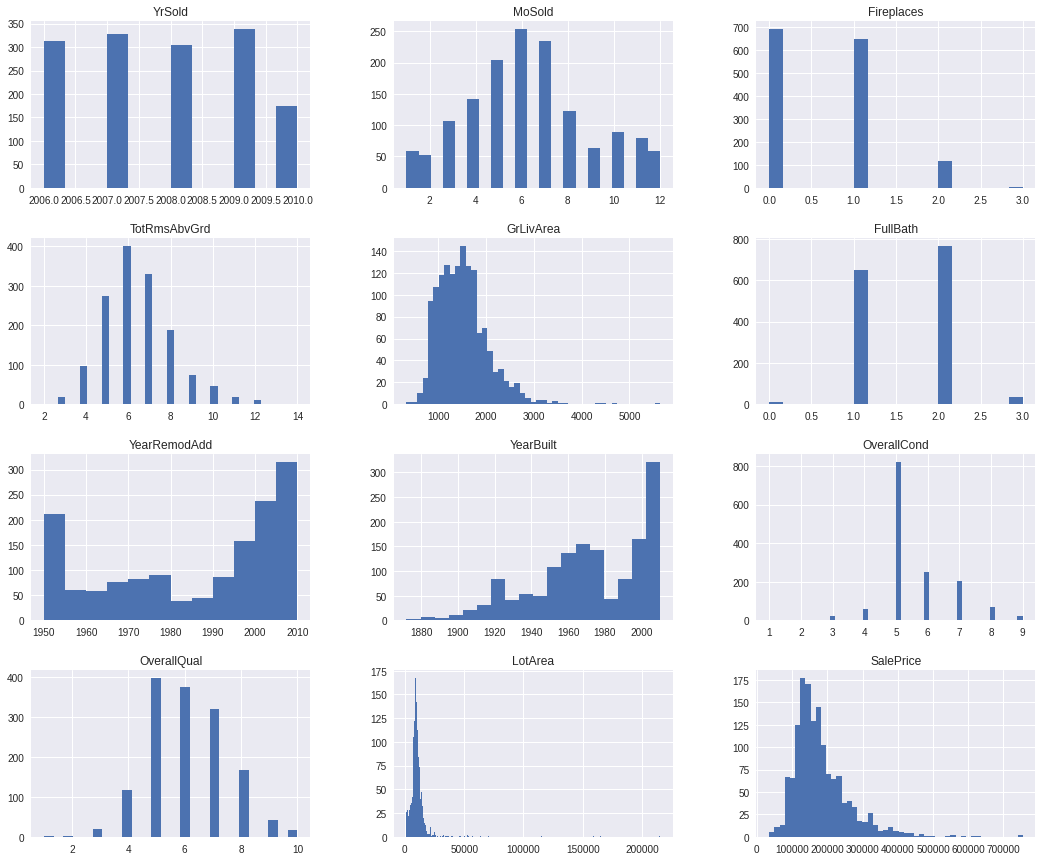

In [4]:
# Histograms
data.hist(figsize=(18,15), bins='auto')

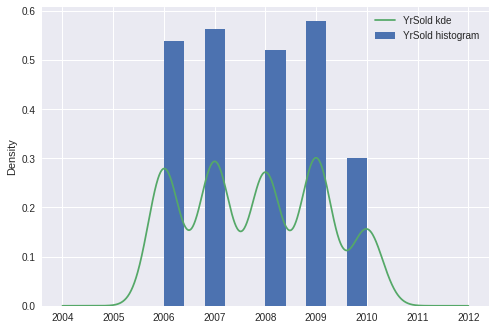

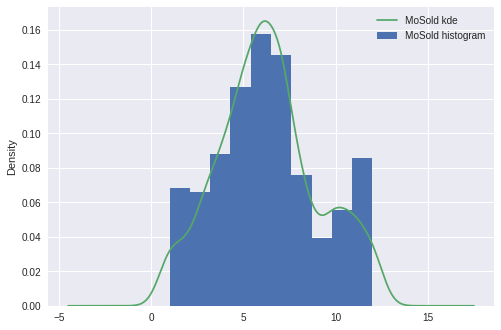

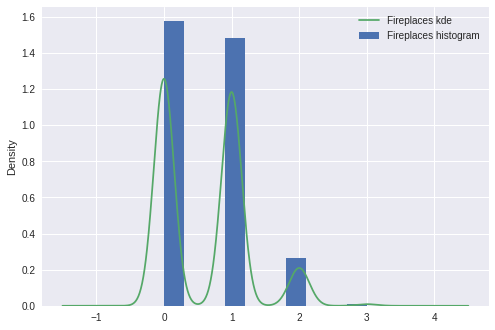

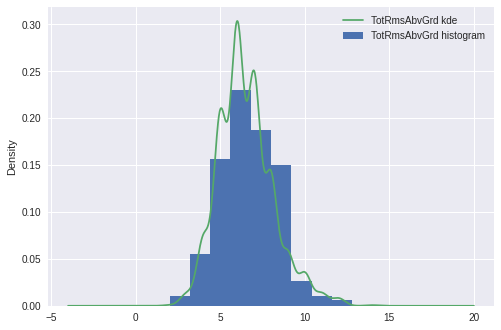

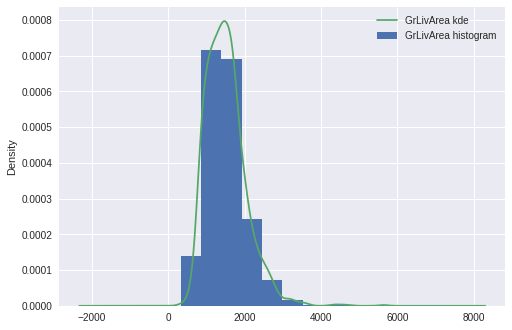

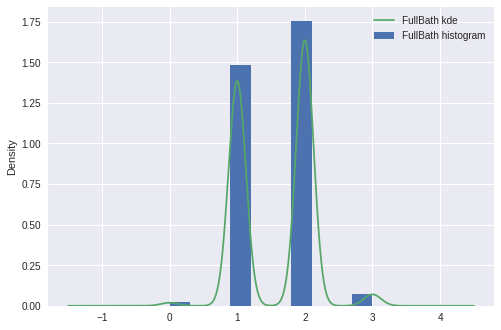

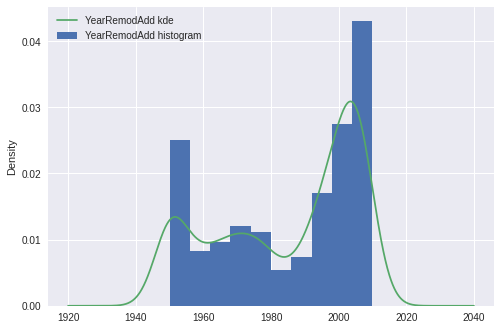

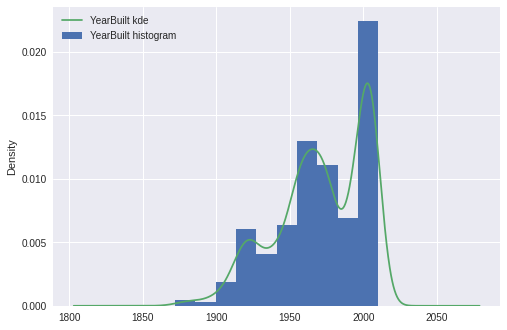

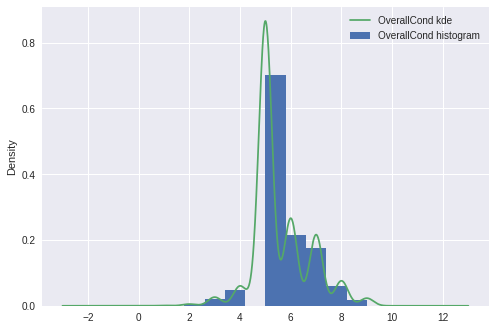

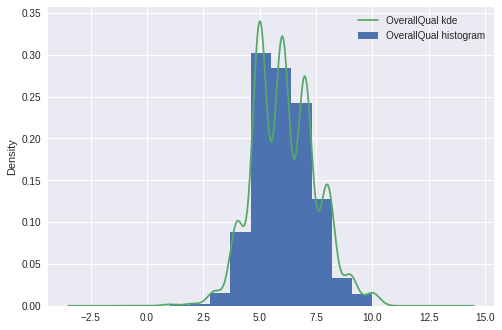

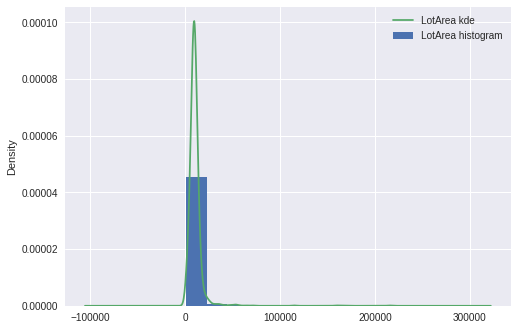

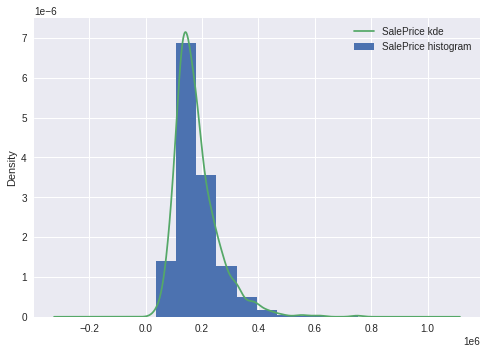

In [5]:
#Histograms w/kde
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [6]:
# Observations 
#GrLivArea, SalePrice and LotArea are all continuous and appear normally distributed
    #most of these are skewed to the left with few very large values
    #the largest amount of houses are sold in Spring & Summer months
    

<AxesSubplot:>

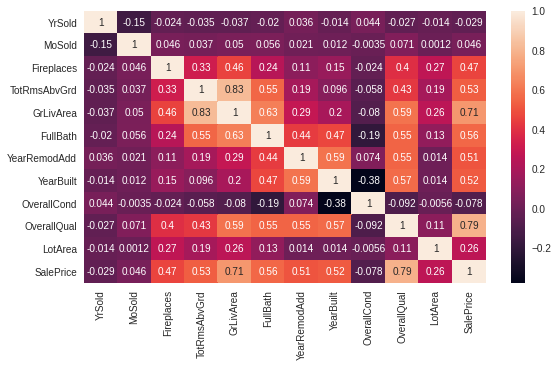

In [7]:
#heatmap to find correlations within the data
plt.figure(figsize=(9,5))
sns.heatmap(data.corr(),annot=True)

In [8]:
#Since there is a strong correlation between 'TotRmsAbvGrd' and 'GrLivArea', recommend eliminating 'TotRmsAbvGrd'since 'GrlivArea' is more strongly correlated to 'saleprice' than 'TotRmsAbvGrd'  

### Check the linearity assumption for all chosen features with target variable using scatter plots

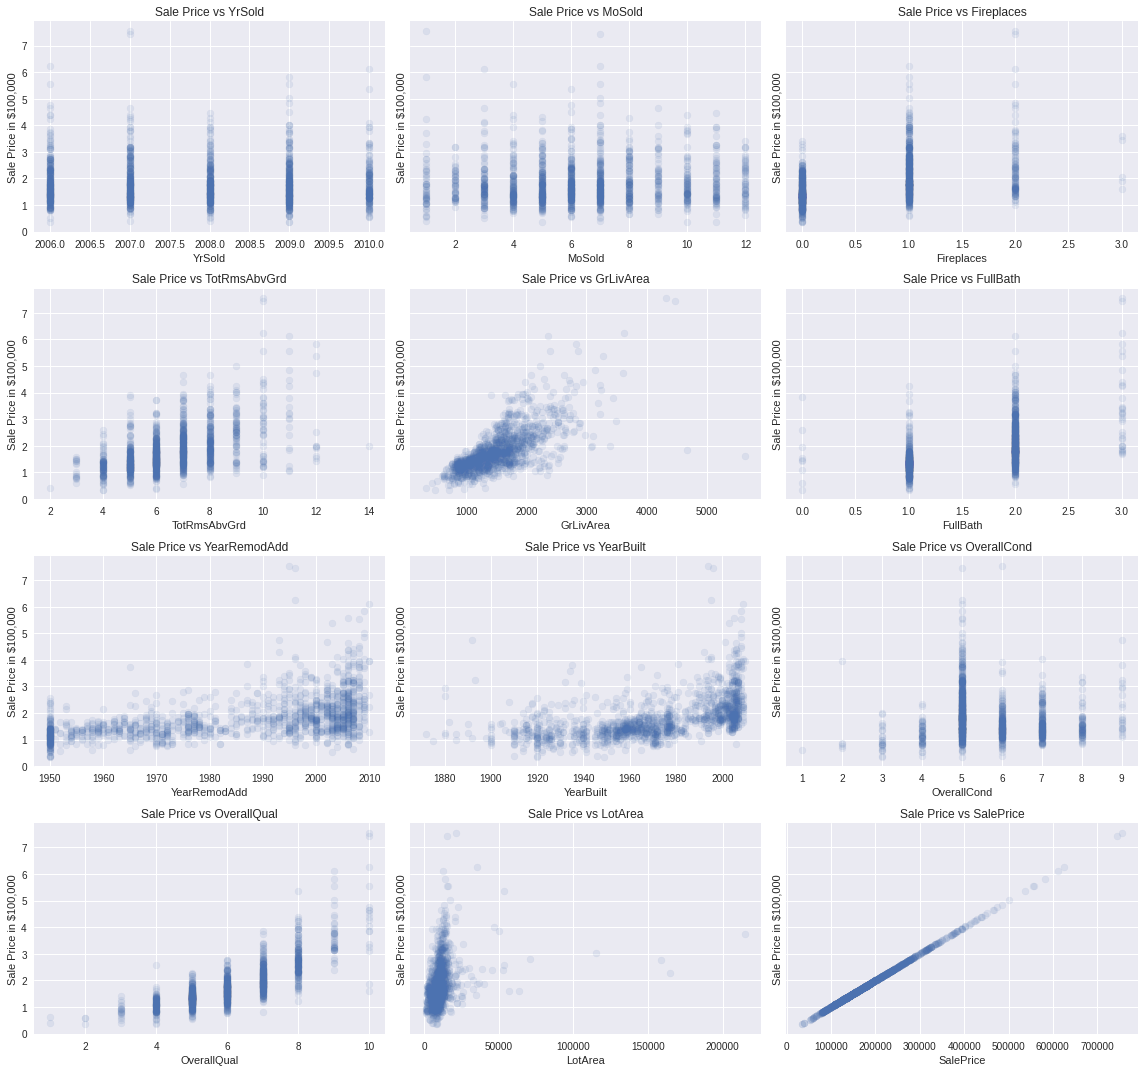

In [9]:
# scatterplots to check for linearity and categoricals 
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), data.columns):
    ax.scatter(data[column], data['SalePrice']/100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')
    
fig.tight_layout()

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YrSold
--------------------------------------------------------------------------------------


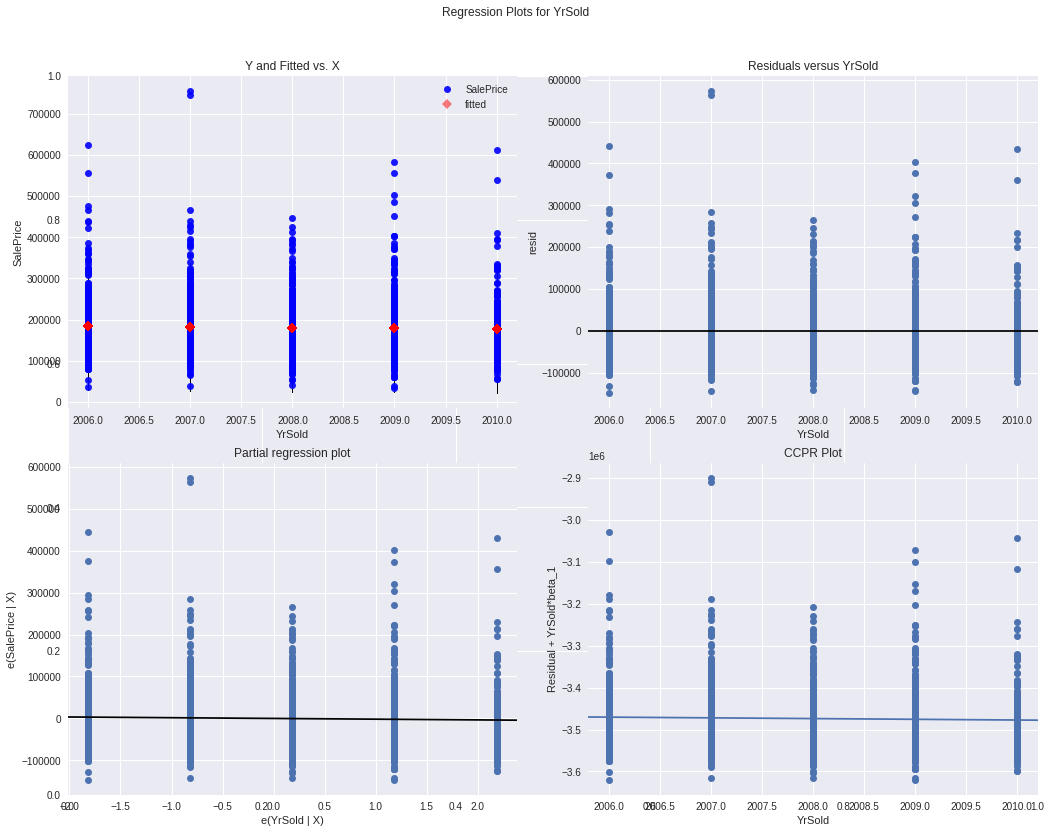

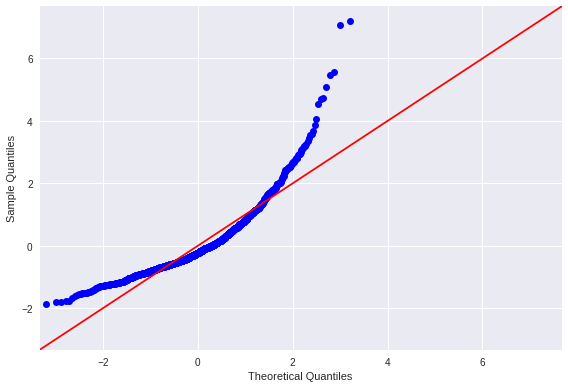

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~MoSold
--------------------------------------------------------------------------------------


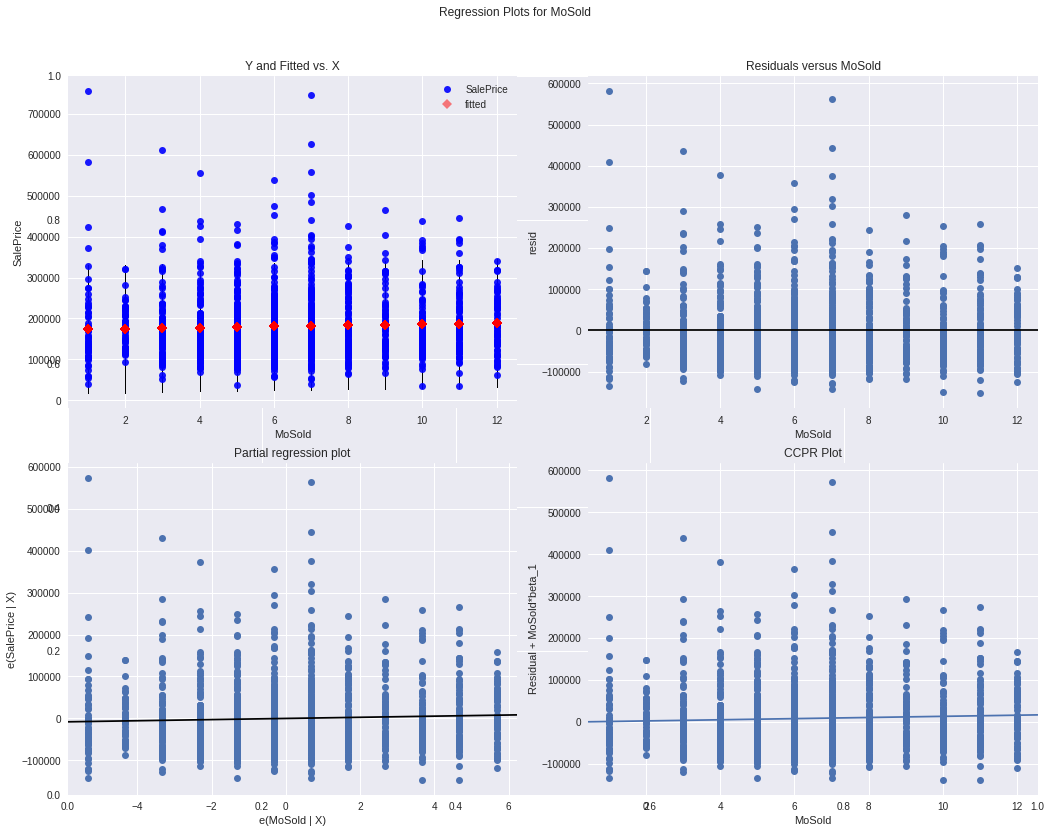

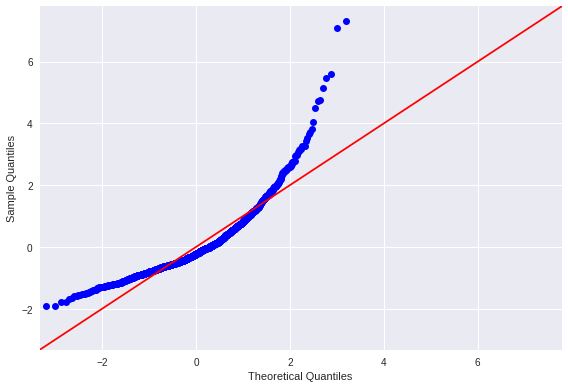

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~Fireplaces
--------------------------------------------------------------------------------------


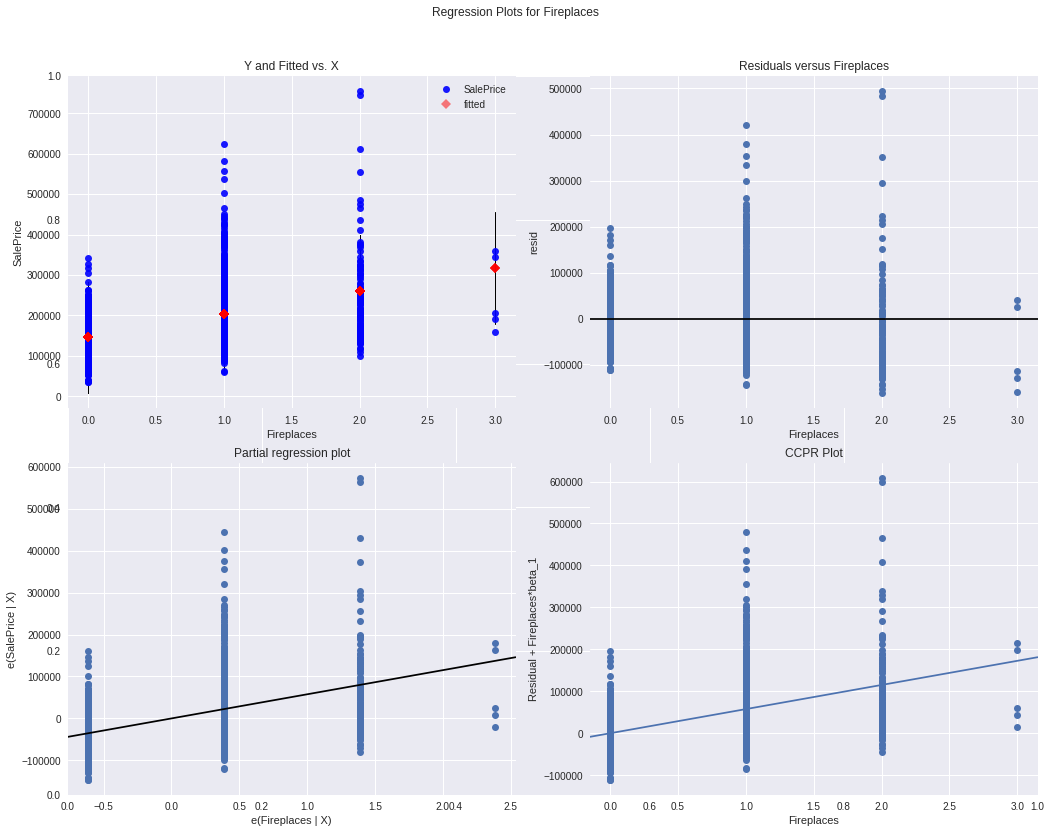

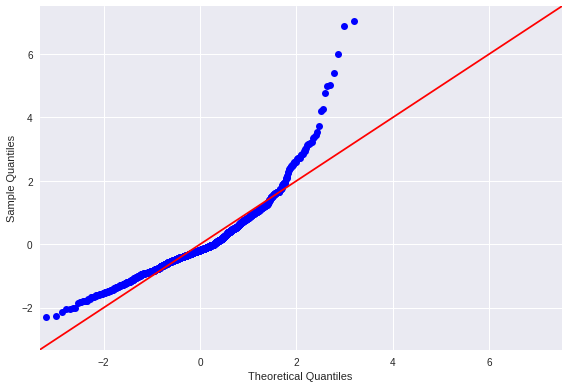

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~TotRmsAbvGrd
--------------------------------------------------------------------------------------


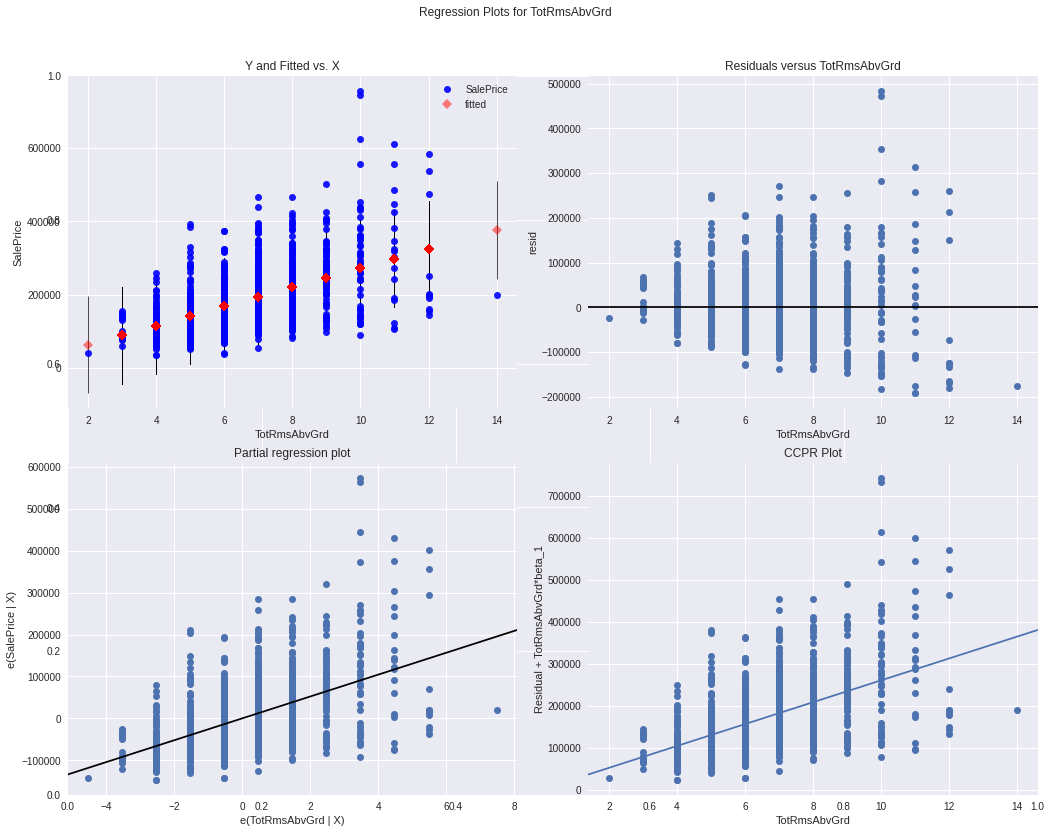

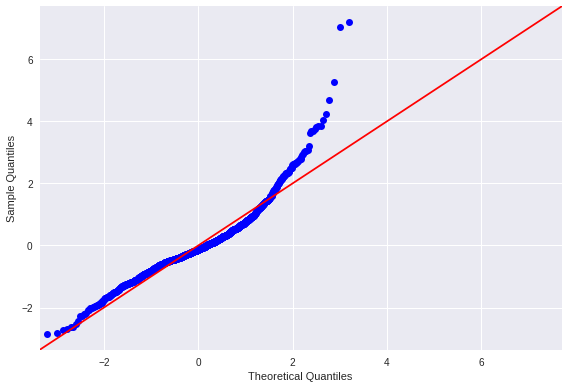

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~GrLivArea
--------------------------------------------------------------------------------------


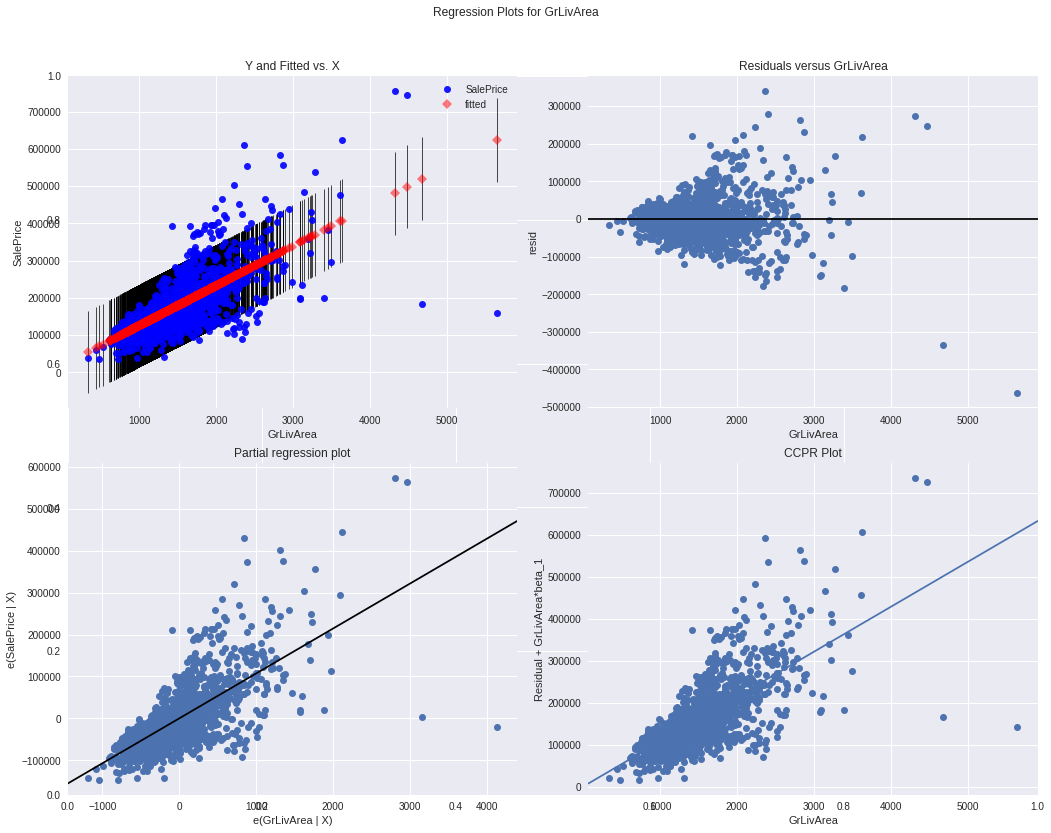

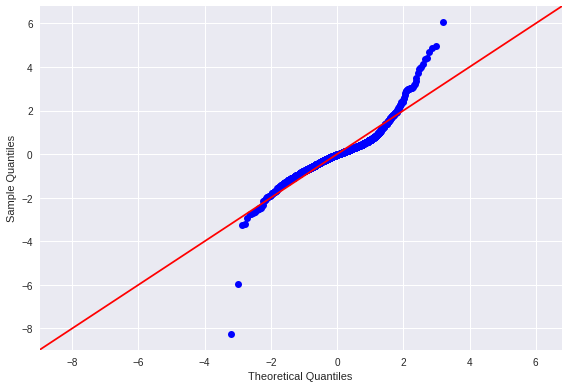

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~FullBath
--------------------------------------------------------------------------------------


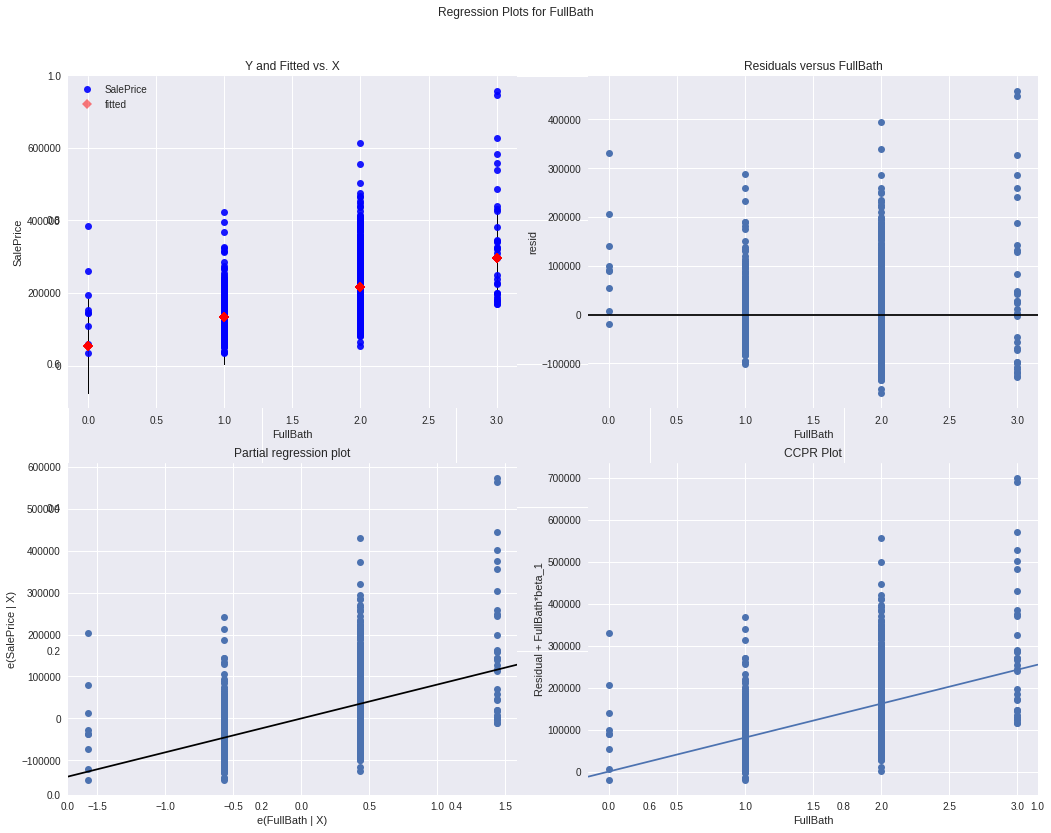

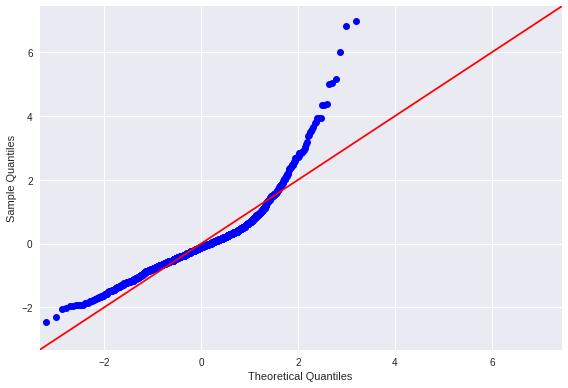

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YearRemodAdd
--------------------------------------------------------------------------------------


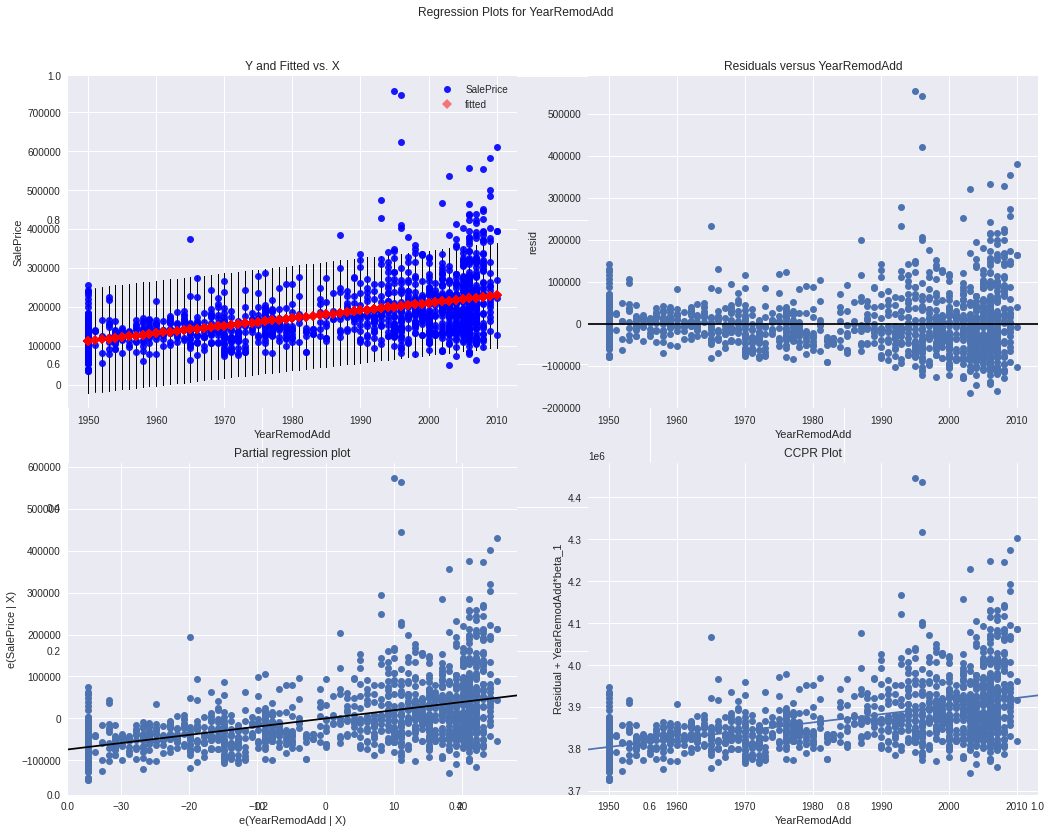

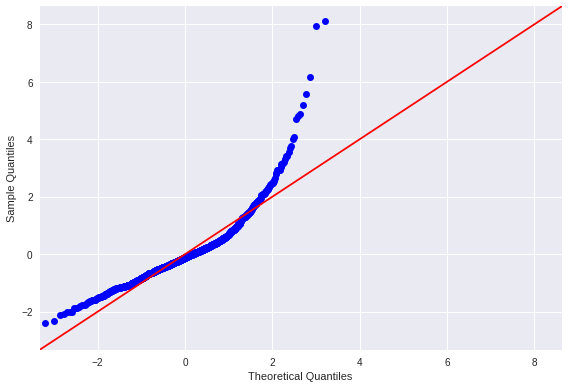

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YearBuilt
--------------------------------------------------------------------------------------


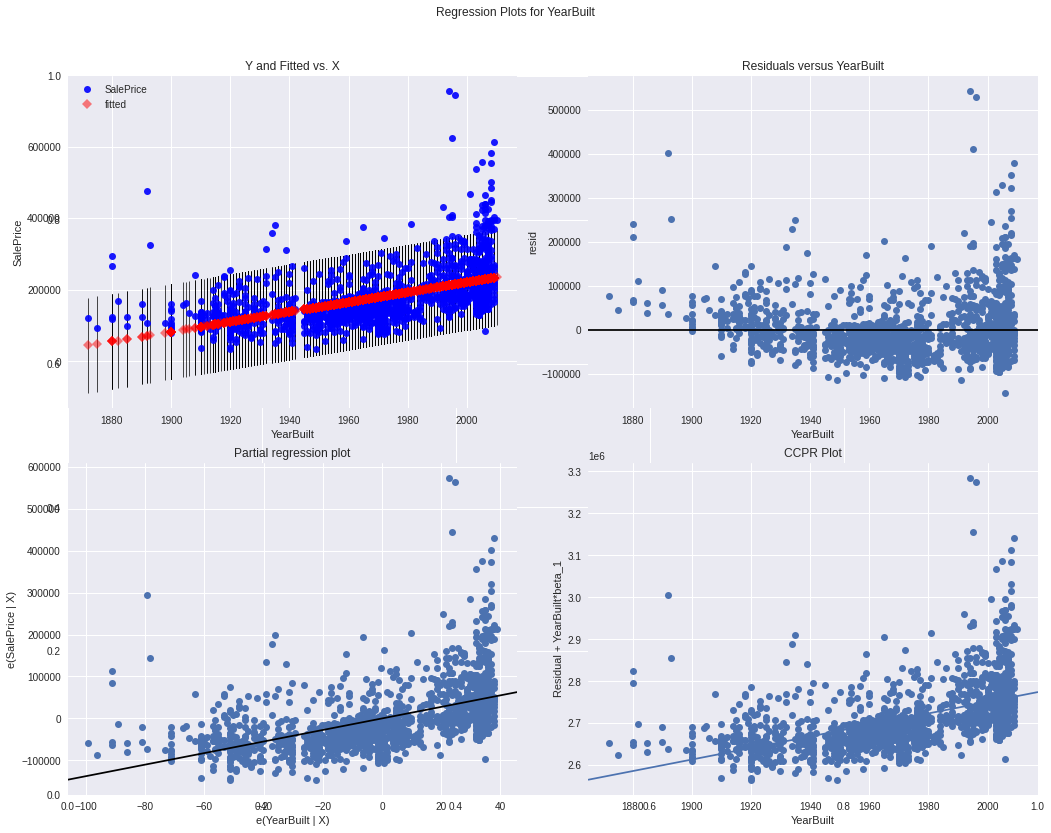

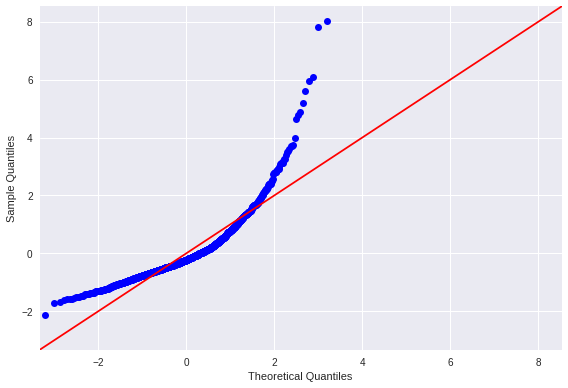

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~OverallCond
--------------------------------------------------------------------------------------


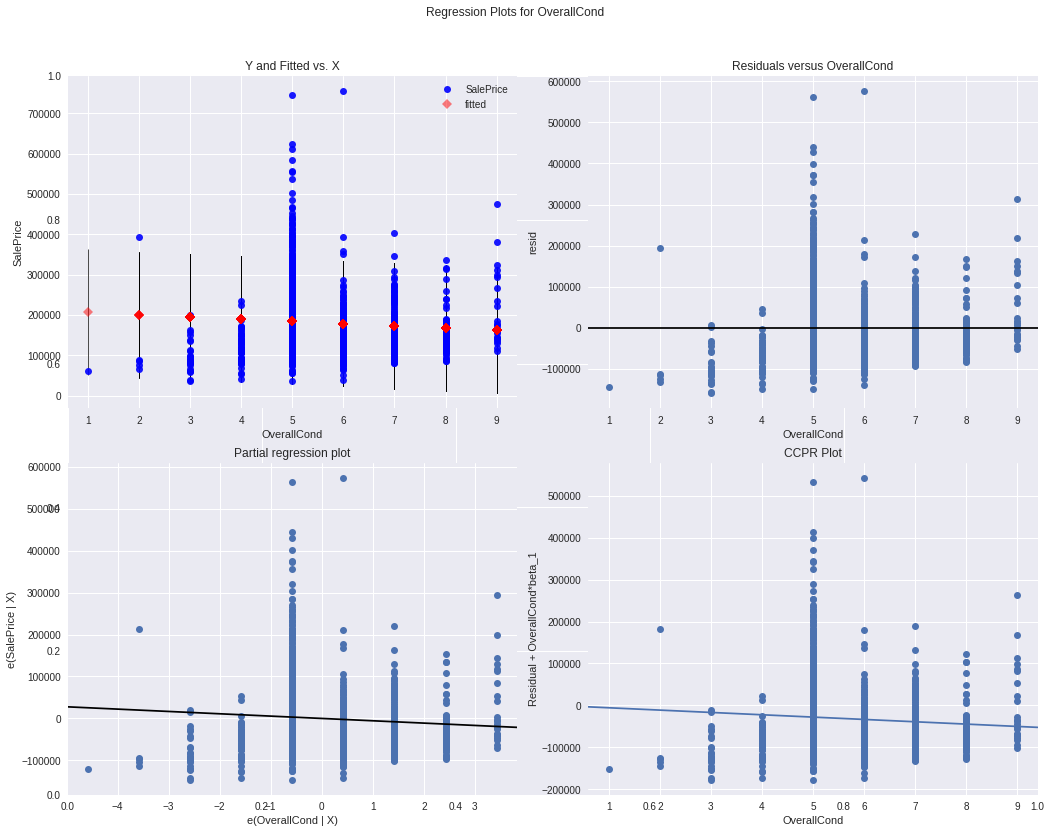

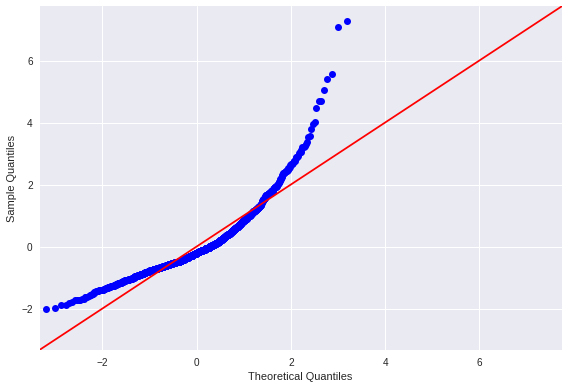

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~OverallQual
--------------------------------------------------------------------------------------


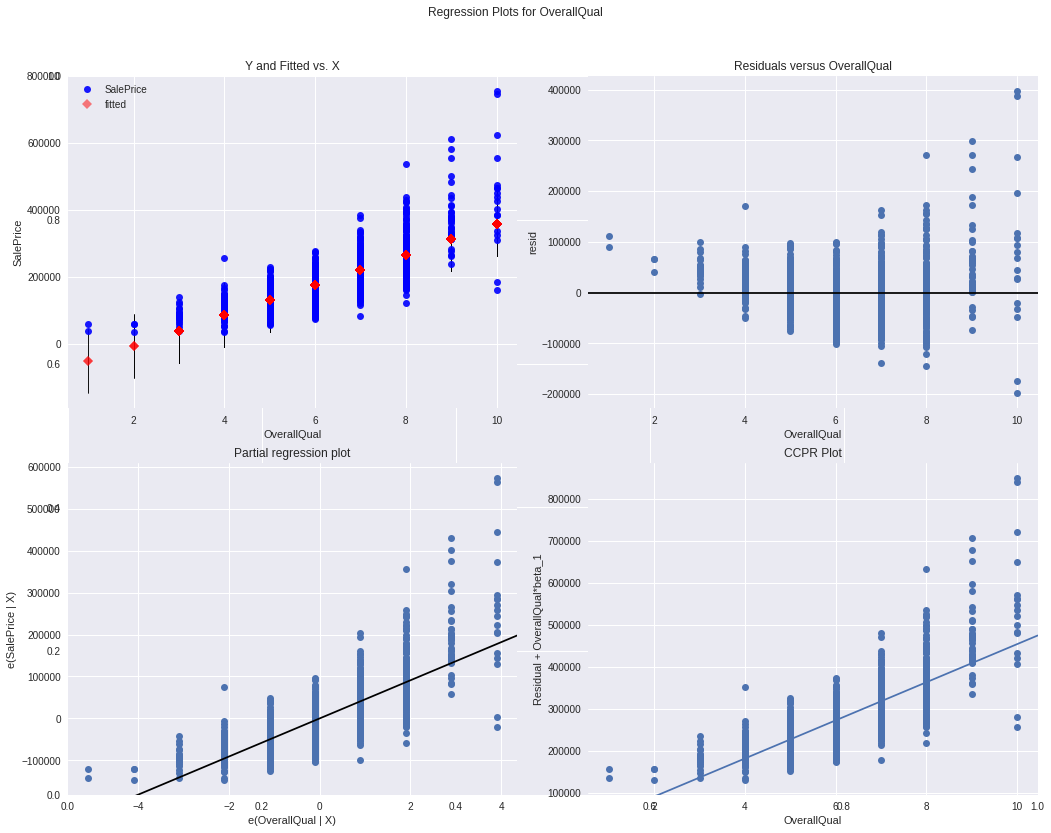

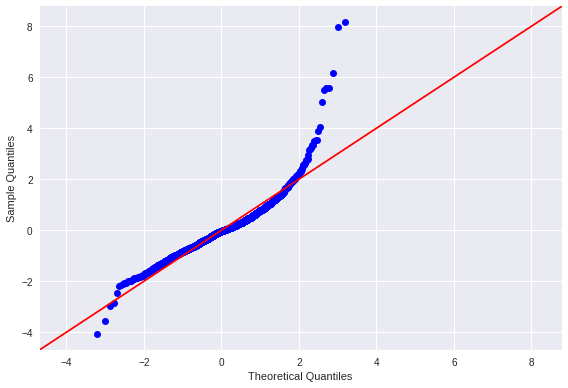

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~LotArea
--------------------------------------------------------------------------------------


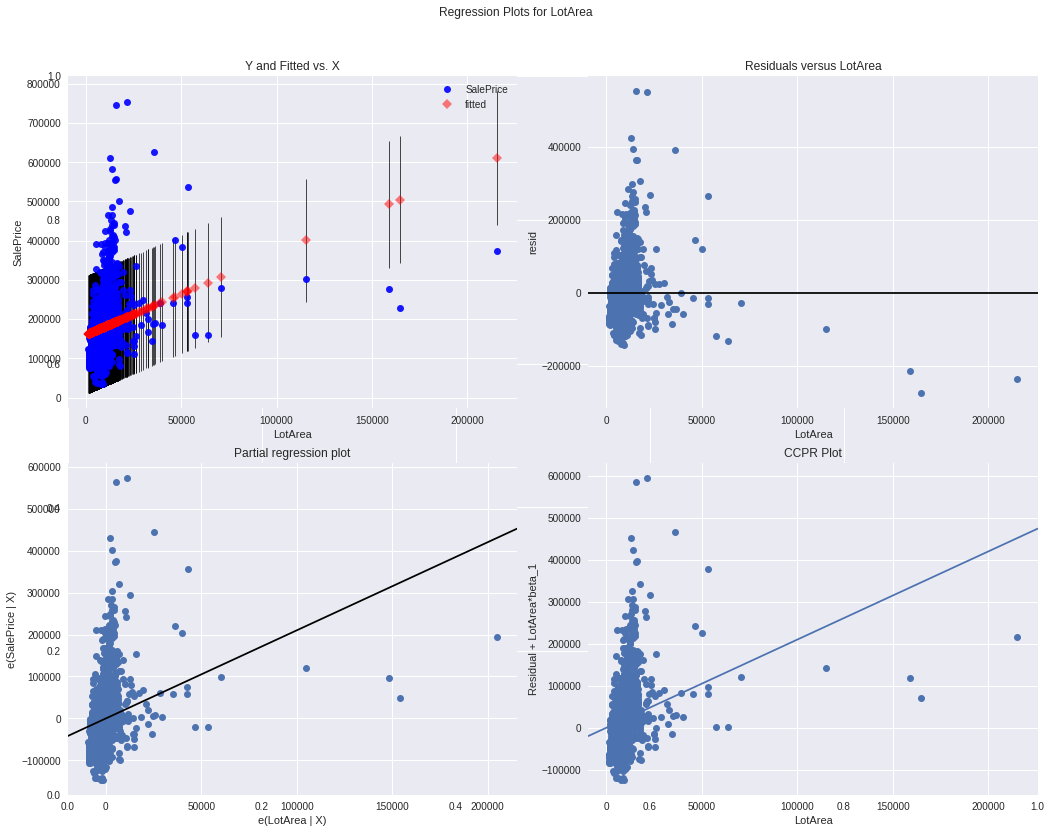

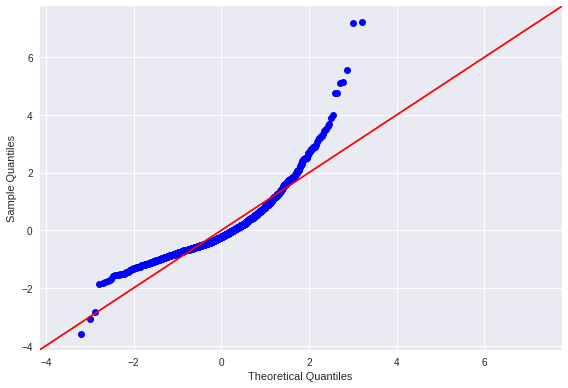

Press Enter to continue...
Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~SalePrice
--------------------------------------------------------------------------------------


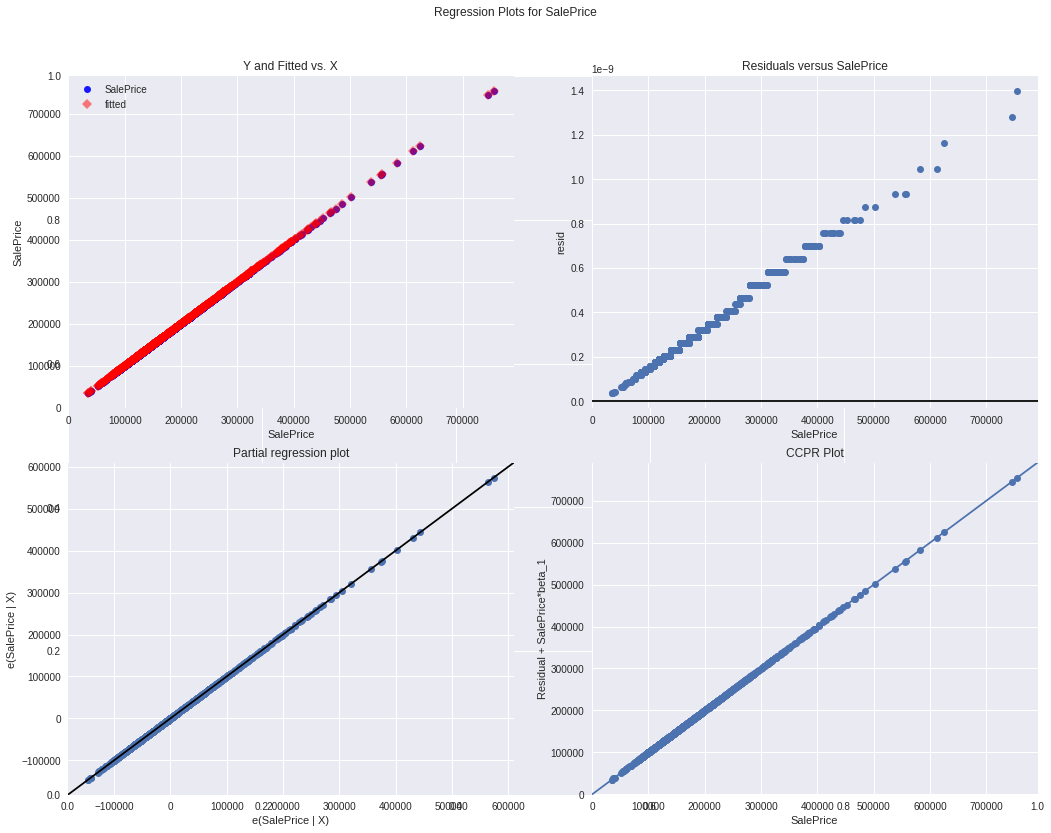

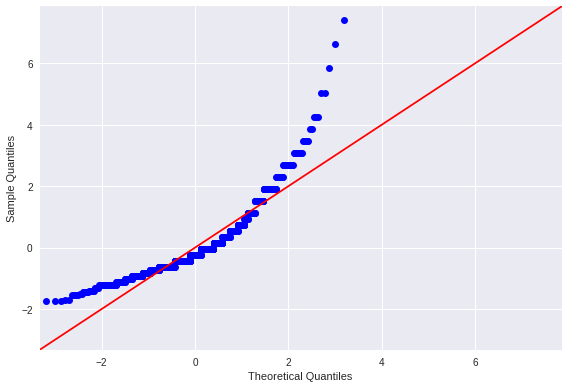

Press Enter to continue...


In [14]:
# Create model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms

results = []
for idx, column in enumerate(data.columns):
    print (f"Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~{column}")
    print ("--------------------------------------------------------------------------------------")
    
    f = f'SalePrice~{column}'
    model = smf.ols(formula=f, data=data).fit()
    
  
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    input("Press Enter to continue...")

In [15]:
pd.DataFrame(results, columns=['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)'])

ind_var  r_squared     intercept         slope        p-value  \
0         YrSold   0.000837  3.654560e+06  -1730.058729   2.694132e-01   
1         MoSold   0.002156  1.722959e+05   1364.350502   7.612758e-02   
2     Fireplaces   0.218023  1.456485e+05  57539.831838   6.141487e-80   
3   TotRmsAbvGrd   0.284860  1.089647e+04  26086.180847  2.772281e-108   
4      GrLivArea   0.502149  1.856903e+04    107.130359  4.518034e-223   
5       FullBath   0.314344  5.438828e+04  80848.166787  1.236470e-121   
6   YearRemodAdd   0.257151 -3.692146e+06   1951.299406   3.164948e-96   
7      YearBuilt   0.273422 -2.530308e+06   1375.373468  2.990229e-103   
8    OverallCond   0.006062  2.119096e+05  -5558.115361   2.912351e-03   
9    OverallQual   0.625652 -9.620608e+04  45435.802593  2.185675e-313   
10       LotArea   0.069613  1.588362e+05      2.099972   1.123139e-24   
11     SalePrice   1.000000  2.728484e-11      1.000000   0.000000e+00   

    normality (JB)  
0      3432.757805  
1      3588.247231  
2      3092.993348  
3      2240.440266  
4      3432.286565  
5      3515.004761  
6      5931.459064  
7      6856.947031  
8      3406.240879  
9      5872.097631  
10     3374.002795  
11     3125.039482

Clearly, the results are not very reliable. The best R-Squared is witnessed with `OverallQual`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Ames dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.

In [16]:
#We had some variables that were had extreme outliers.  And, since the count of those outliers were very small, we decide to drop values outside of two standard deviations of the SalePrice
std = data['SalePrice'].std()
mean = data['SalePrice'].mean()
step1 = data[data['SalePrice'] > (mean - 2 * std)]
step2 = step1[step1['SalePrice'] < (mean + 2 * std)]
step2 = step2[step2['LotArea'] < 50000]


Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YrSold
--------------------------------------------------------------------------------------


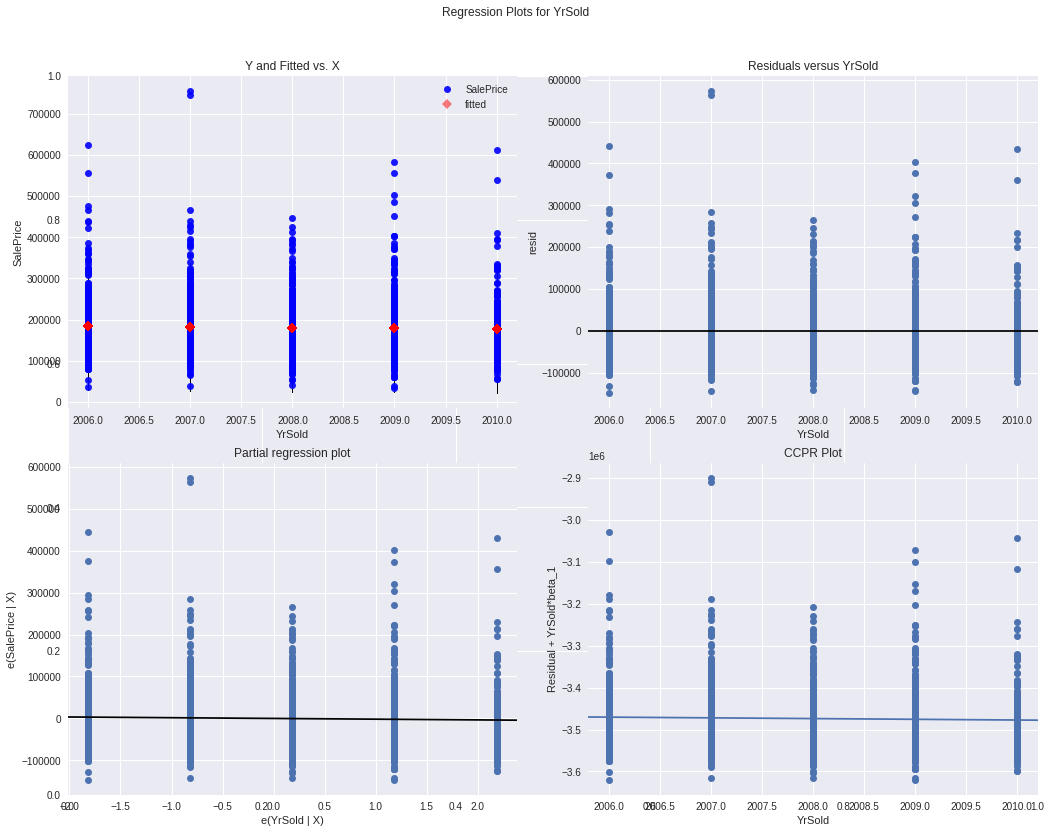

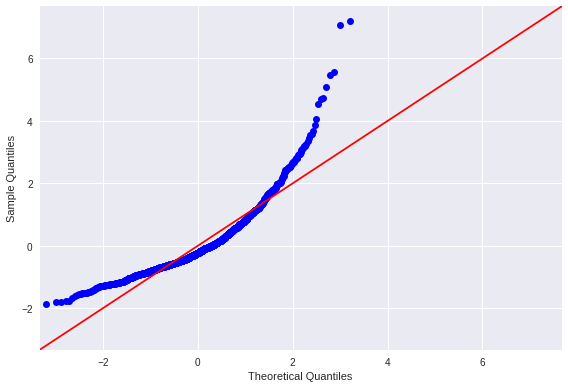

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~MoSold
--------------------------------------------------------------------------------------


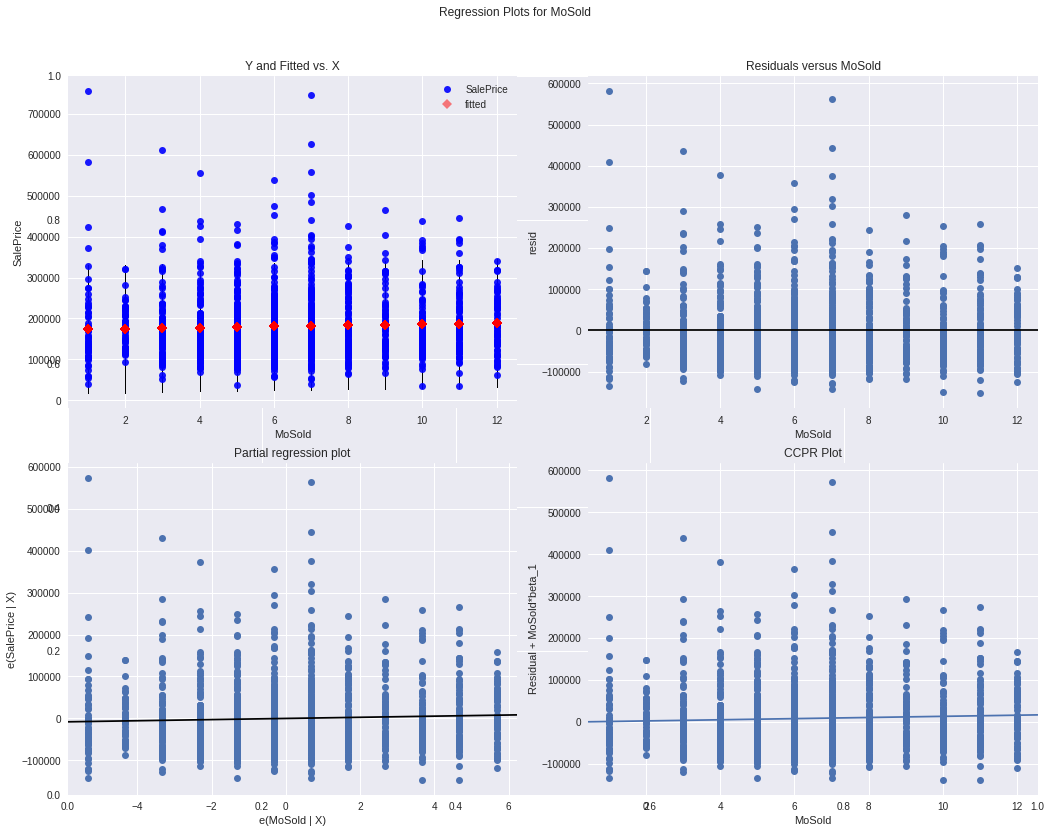

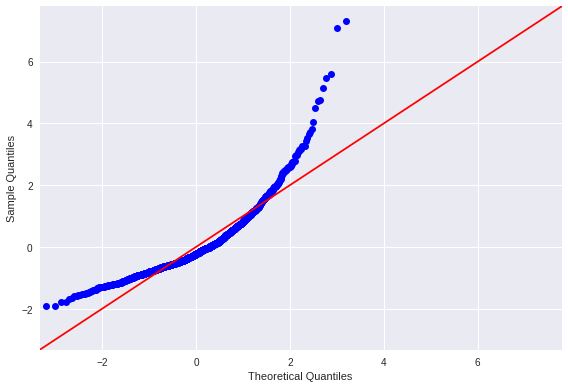

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~Fireplaces
--------------------------------------------------------------------------------------


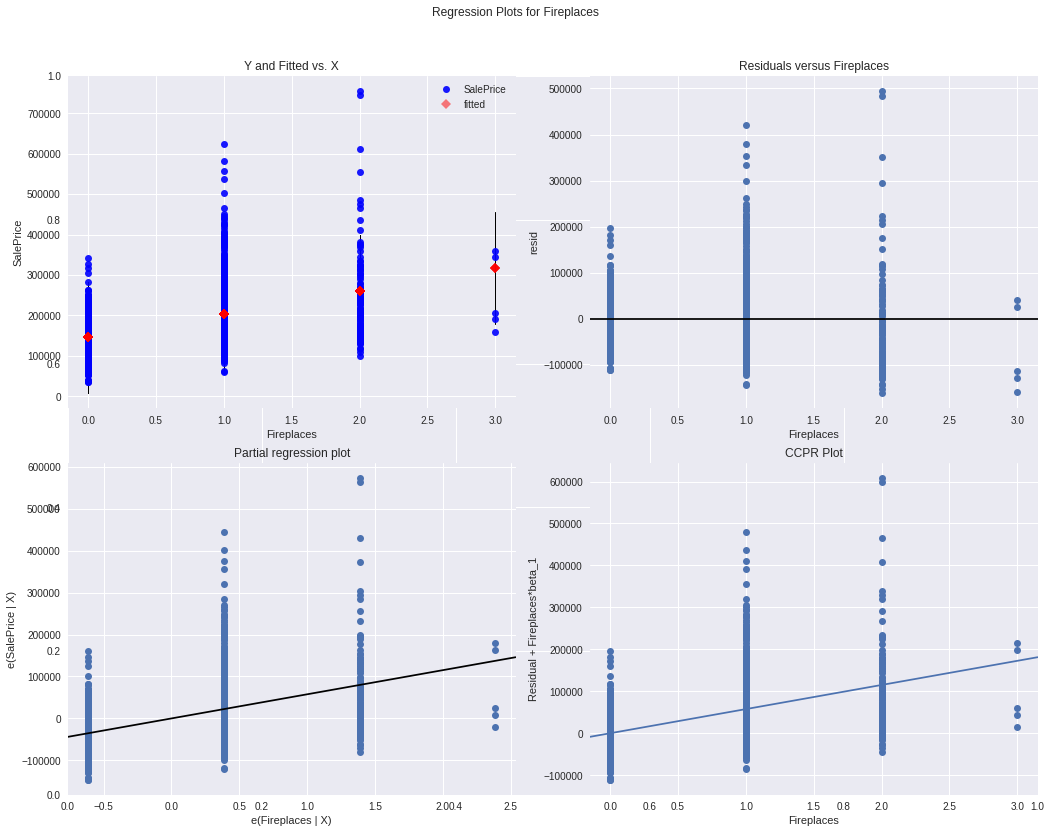

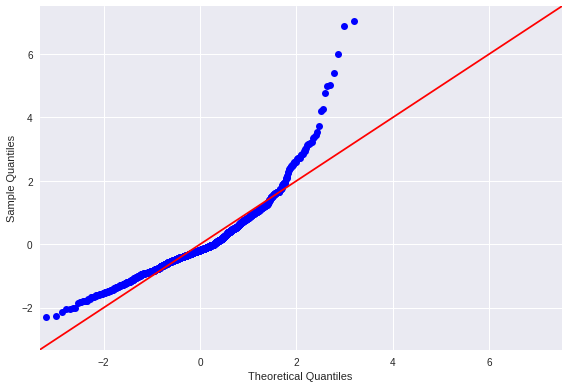

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~TotRmsAbvGrd
--------------------------------------------------------------------------------------


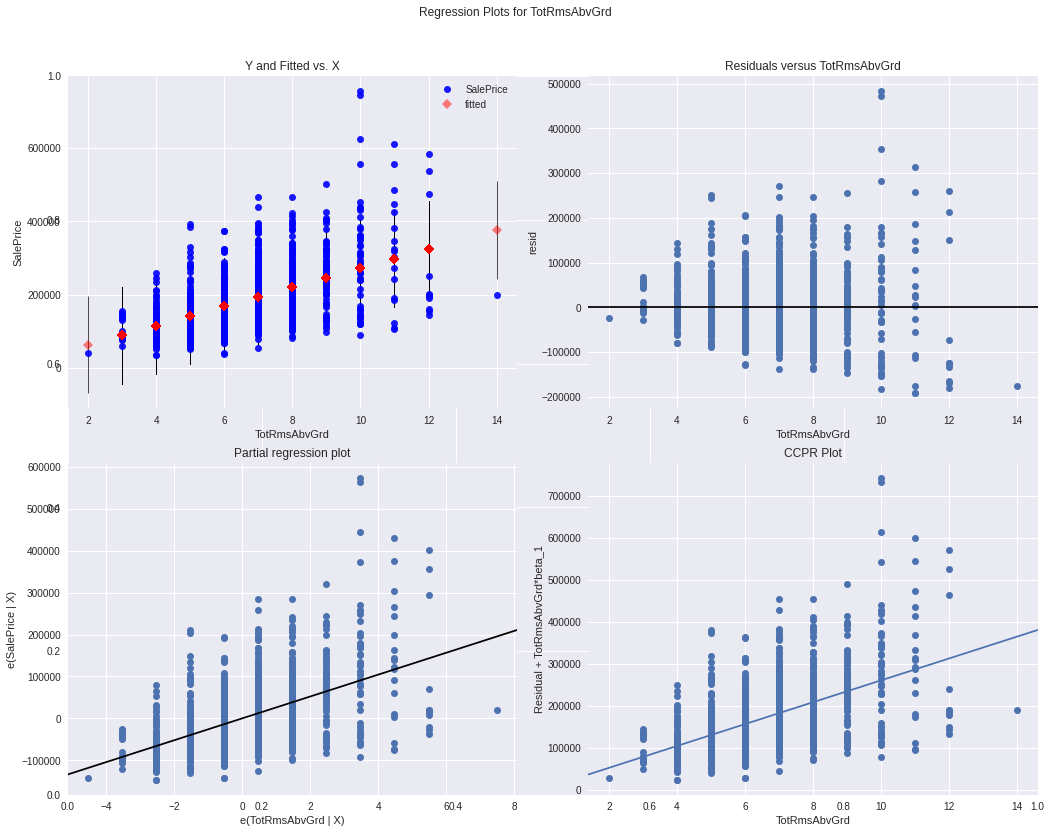

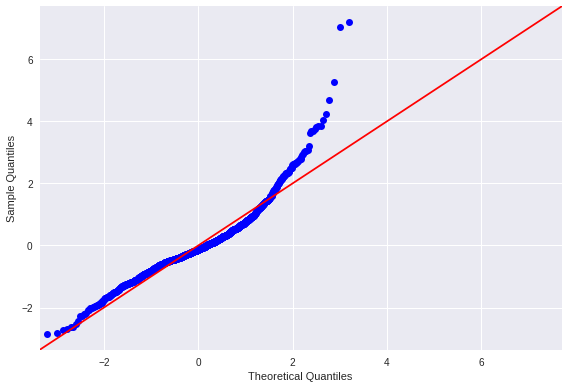

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~GrLivArea
--------------------------------------------------------------------------------------


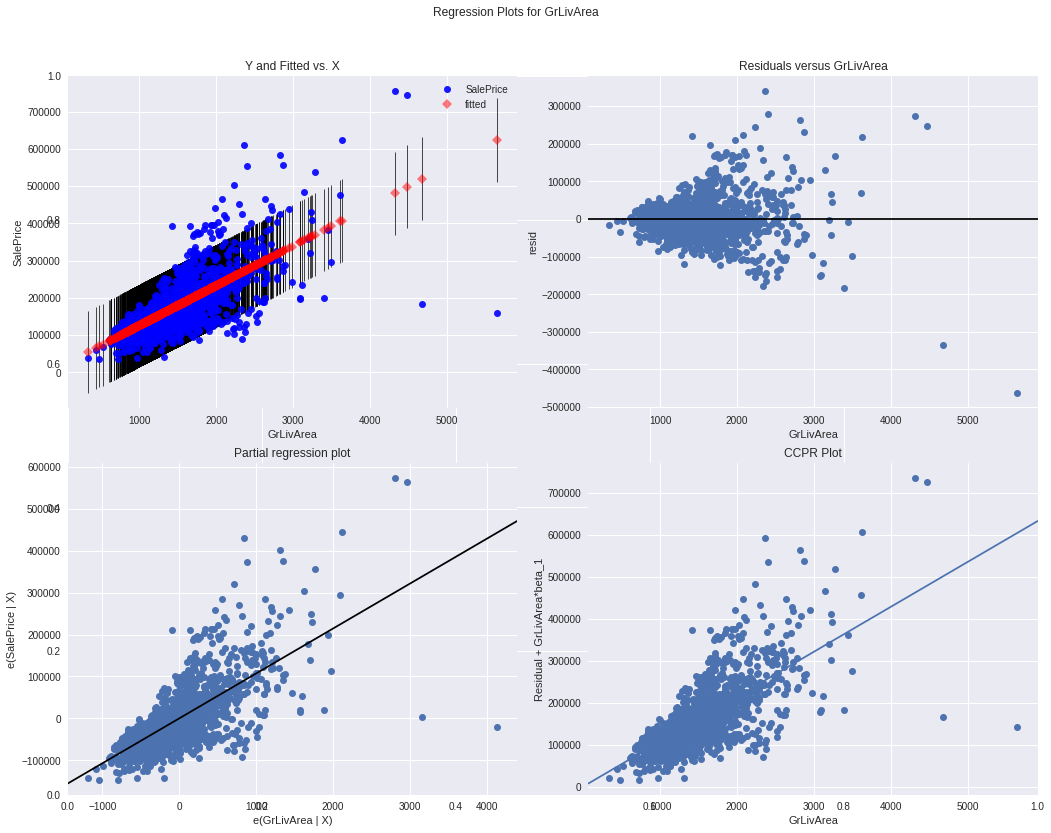

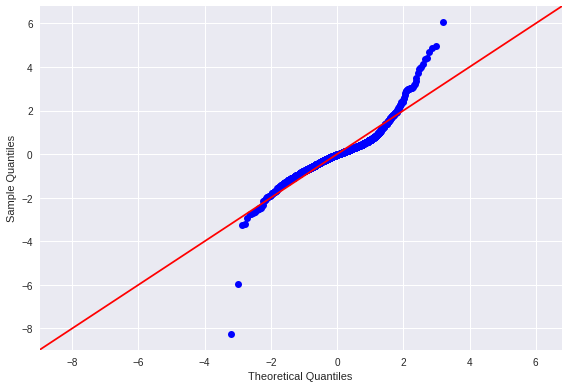

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~FullBath
--------------------------------------------------------------------------------------


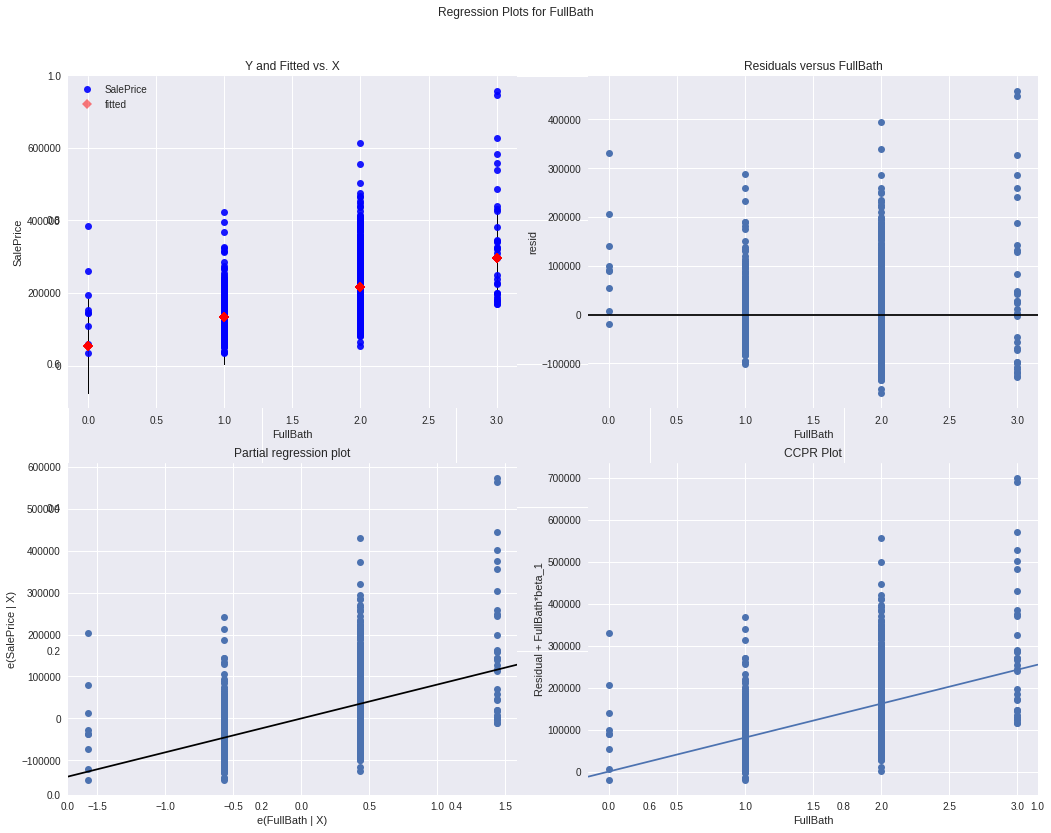

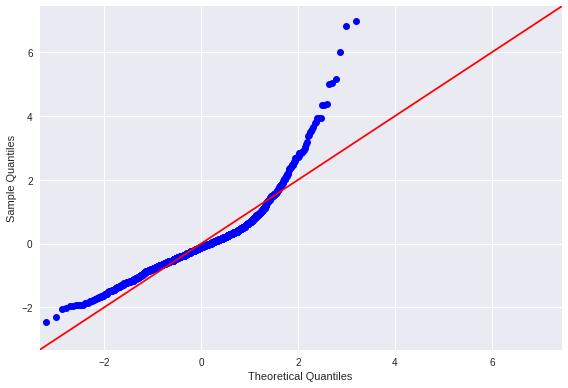

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YearRemodAdd
--------------------------------------------------------------------------------------


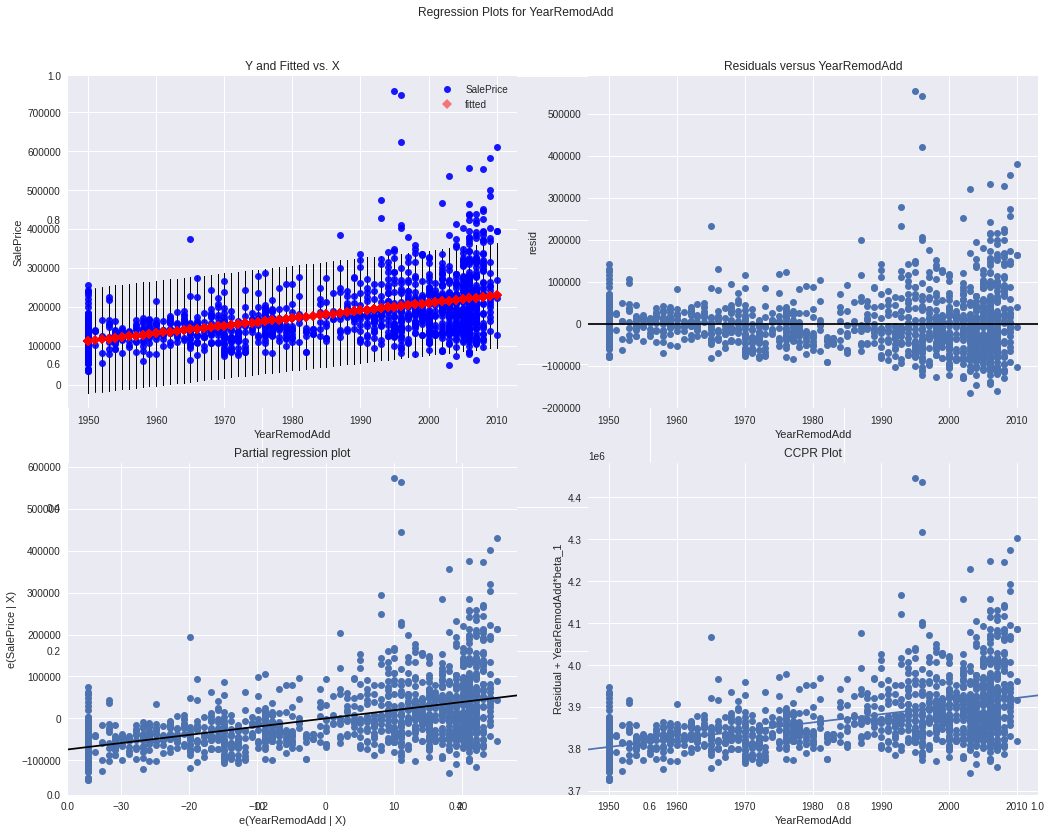

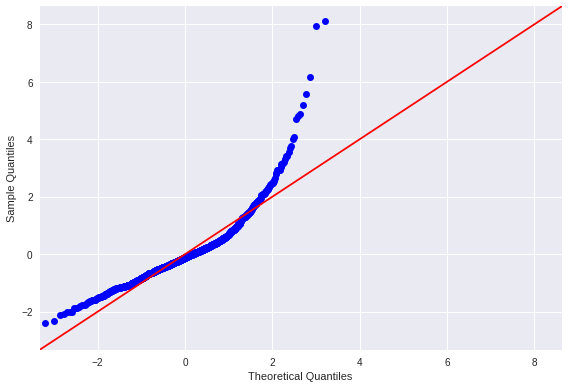

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~YearBuilt
--------------------------------------------------------------------------------------


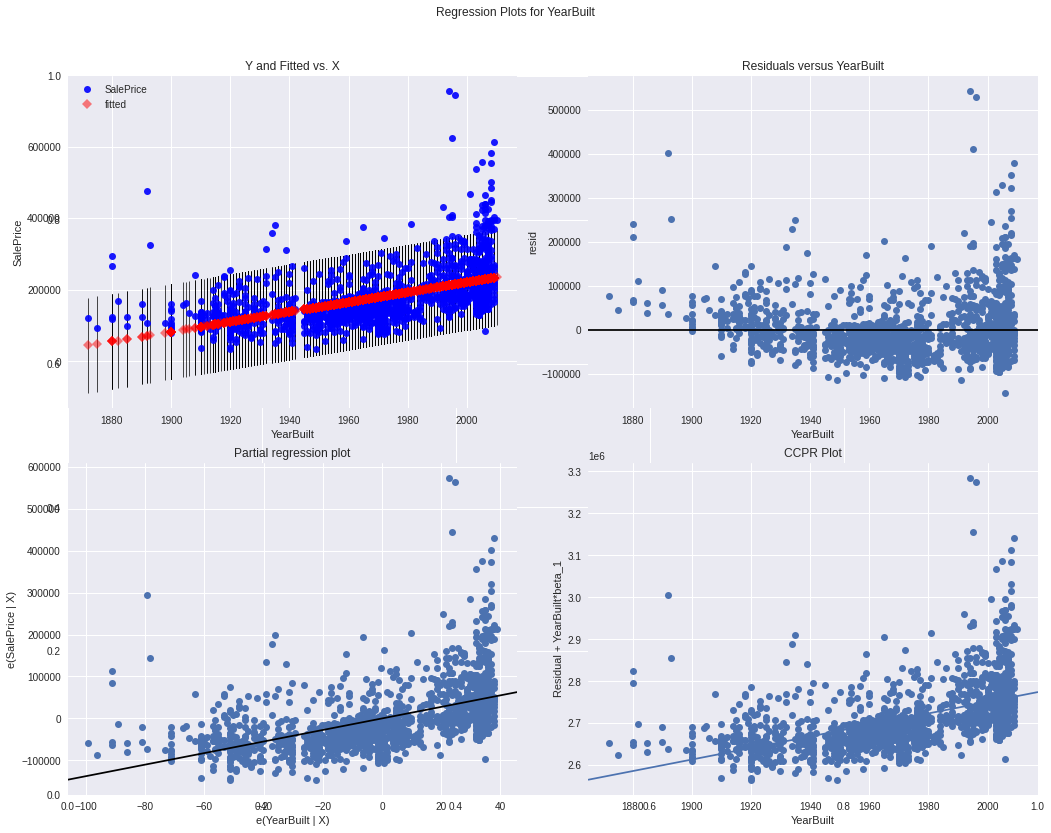

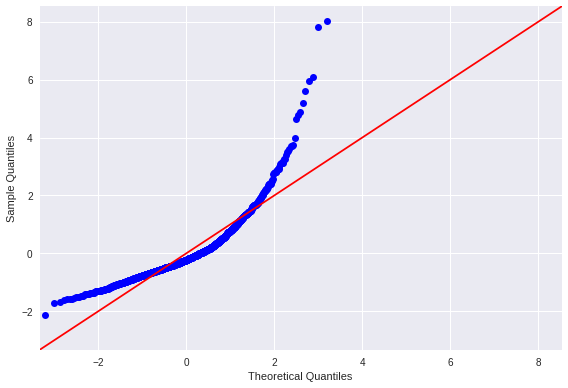

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~OverallCond
--------------------------------------------------------------------------------------


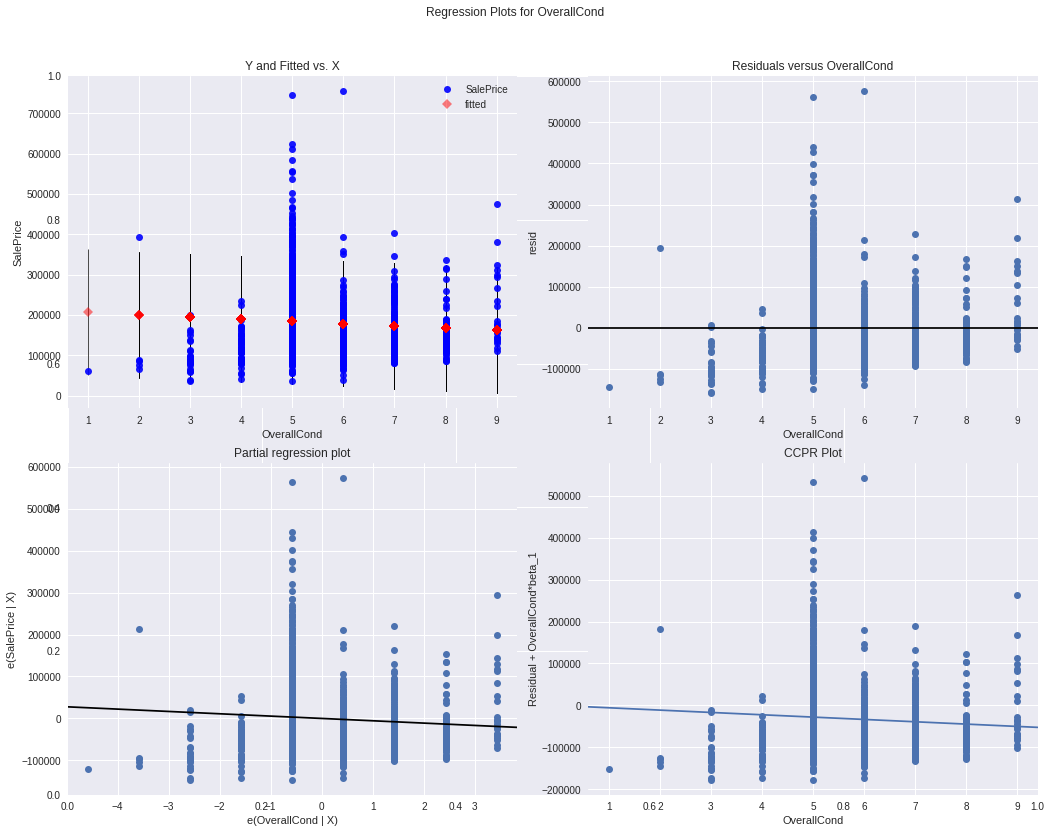

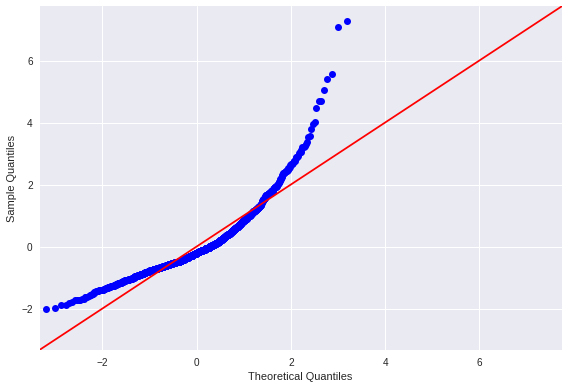

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~OverallQual
--------------------------------------------------------------------------------------


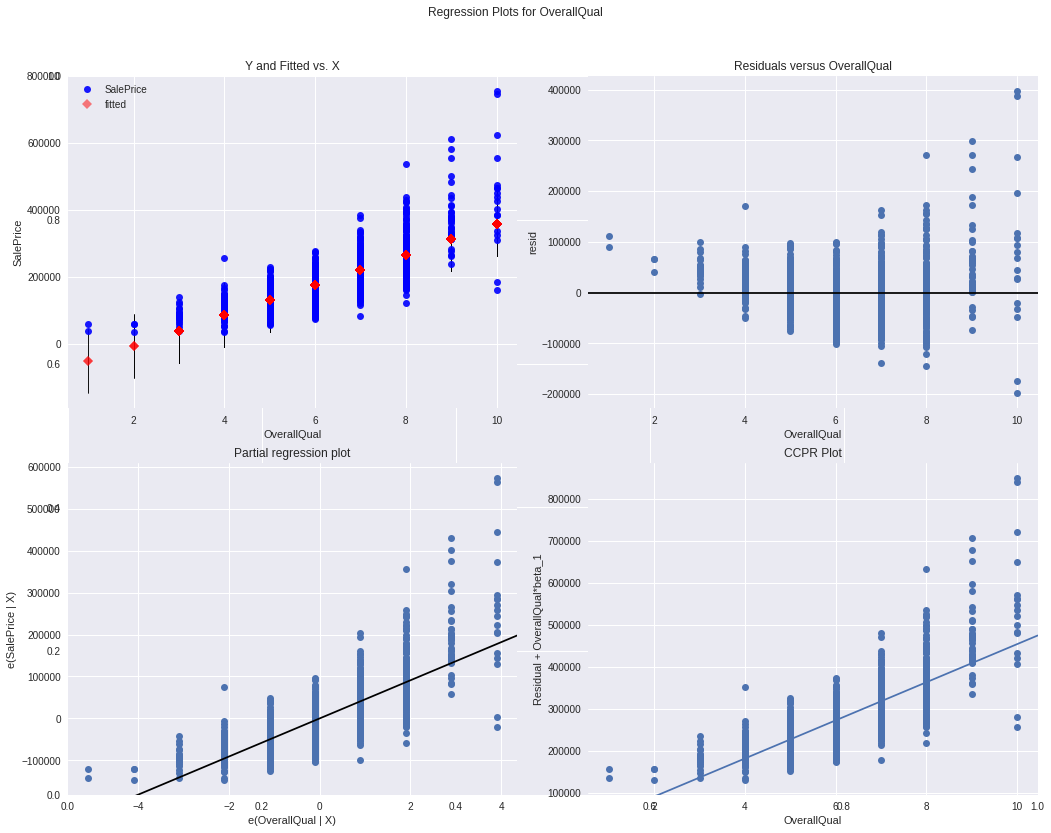

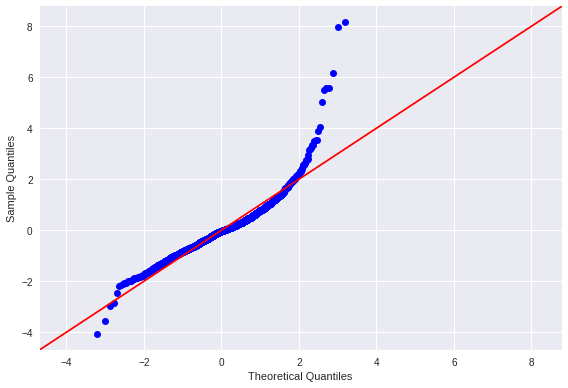

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~LotArea
--------------------------------------------------------------------------------------


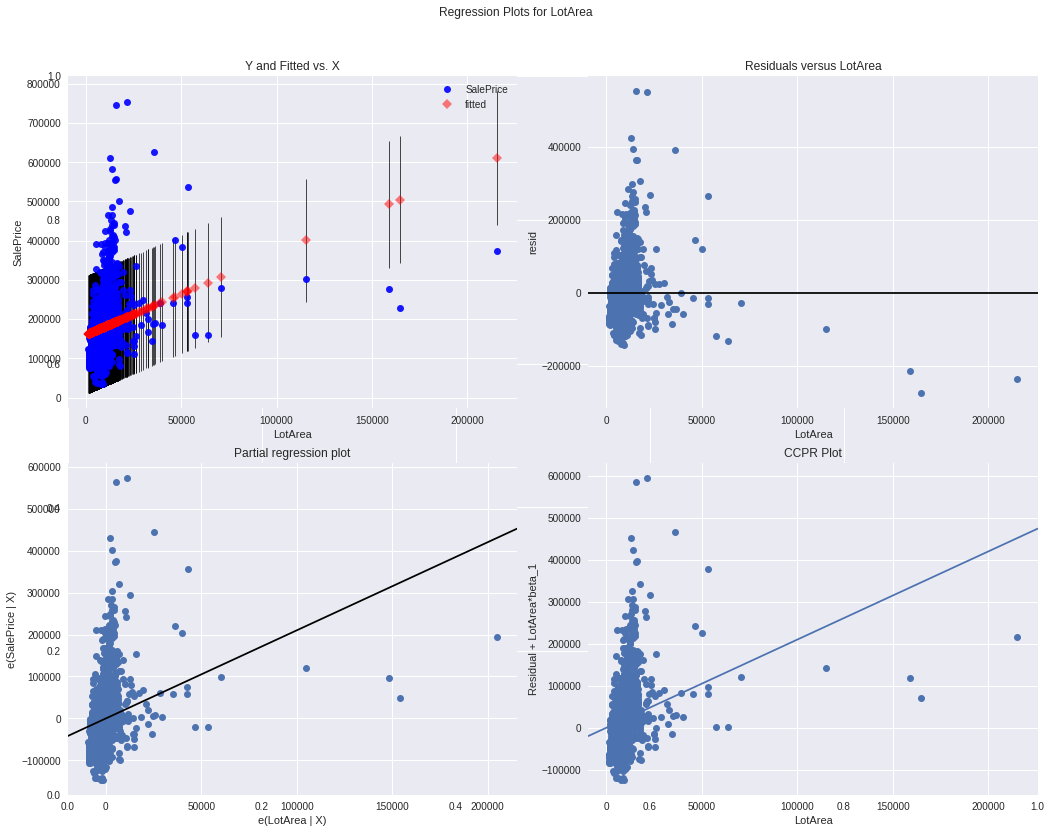

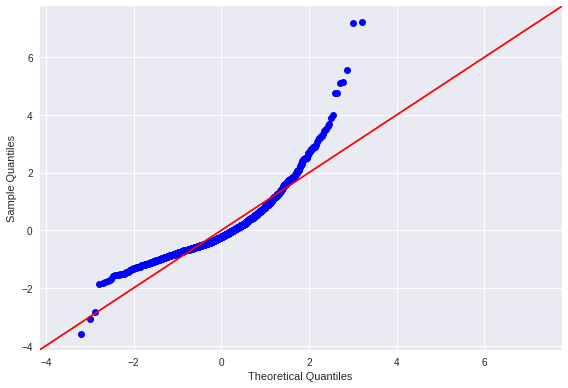

Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~SalePrice
--------------------------------------------------------------------------------------


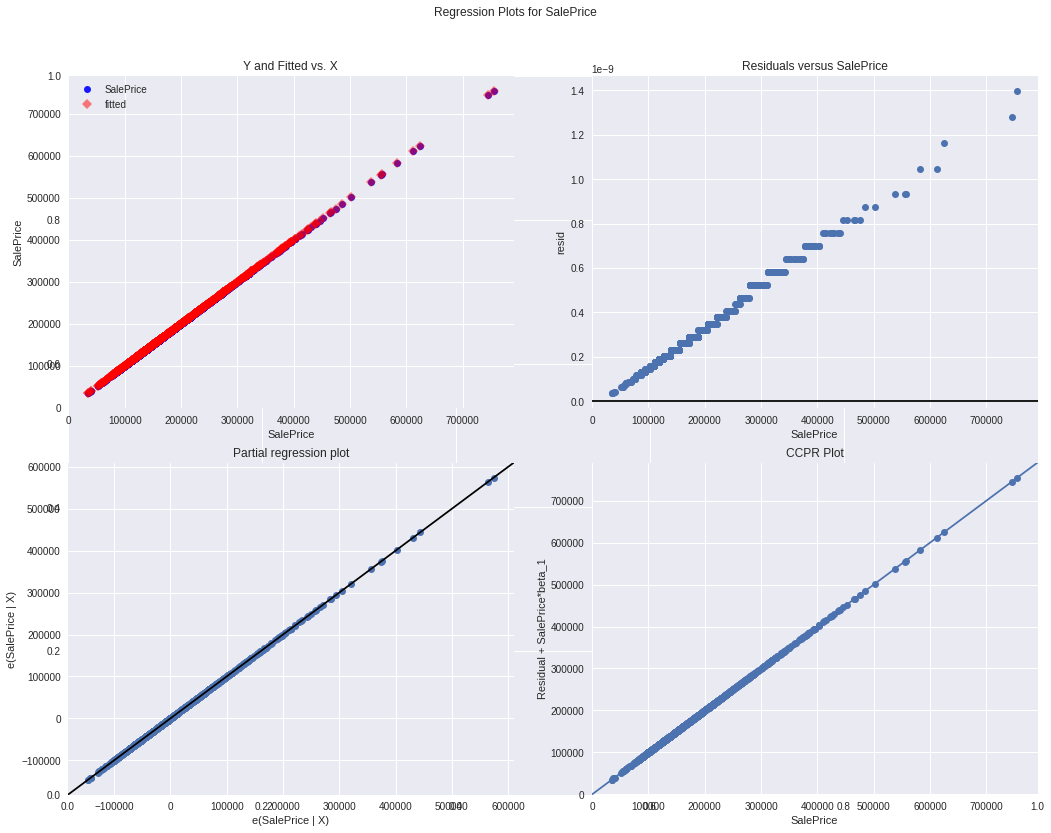

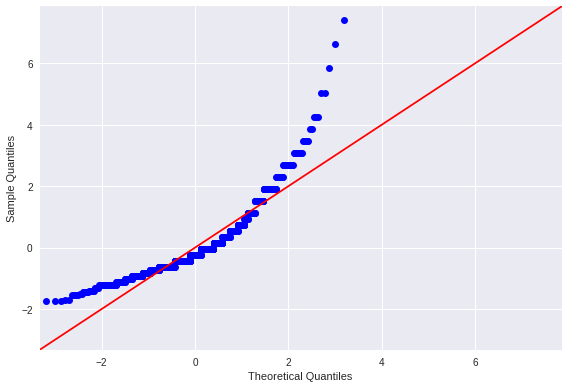

In [17]:
# graph and find QQ plots to review how the changes in our data impacted the model
results = []
for idx, column in enumerate(step2.columns):
    print (f"Ames Housing DataSet - Regression Analysis and Diagnostics for SalesPrice~{column}")
    print ("--------------------------------------------------------------------------------------")
    f = f'SalePrice~{column}'
    model = smf.ols(formula=f, data=data).fit()
    fig, axes = plt.subplots(figsize=(15,12))
    fig = sm.graphics.plot_regress_exog(model, column, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    fig.tight_layout()
    plt.show()
    results.append([column, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])


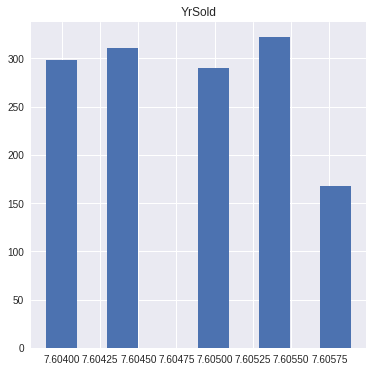

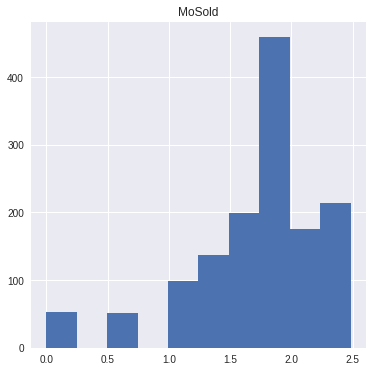

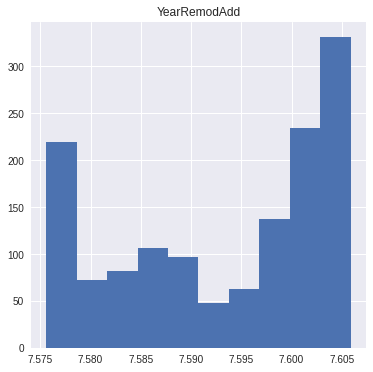

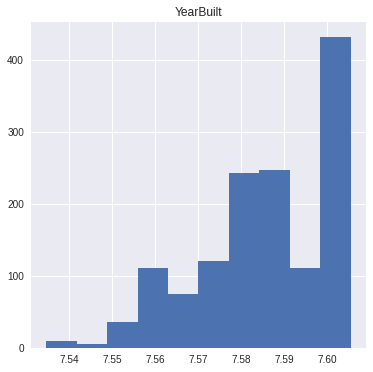

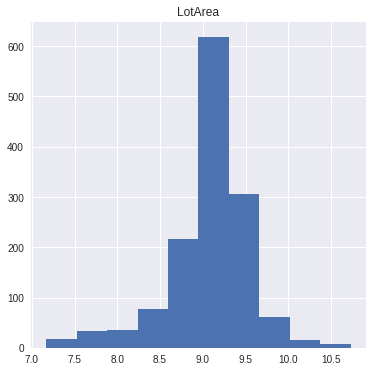

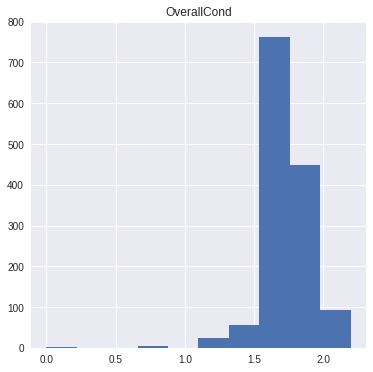

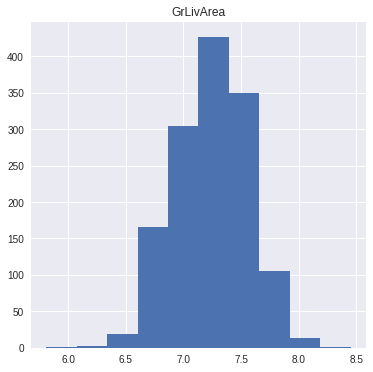

In [19]:
#We still needed to deal with the crooked QQ plots, so we completed log transform on these variables
import numpy as np
collist = ['YrSold','MoSold','YearRemodAdd','YearBuilt','LotArea','OverallCond','GrLivArea']
for col in collist:
    data_log = pd.DataFrame([])
    data_log[col] = np.log(step2[col])
    data_log.hist(figsize  = [6, 6]);


In [20]:
#Train-Test-Split
y = step2[['SalePrice']]
X = step2.drop(['SalePrice'], axis=1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

1041 348 1041 348


In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression()

In [23]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [24]:
# Calculate training and test MSE
from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 673036569.0137672
Test Mean Squarred Error: 602264398.9562031


In [30]:
#Model before transformation
outcome = 'SalePrice'
x_cols = collist
predictors = '+' .join(x_cols)
formula = outcome + '~'+ predictors
model = smf.ols(formula=formula, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     453.1
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:24:38   Log-Likelihood:                -17699.
No. Observations:                1460   AIC:                         3.541e+04
Df Residuals:                    1452   BIC:                         3.546e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.833e+06   1.79e+06     -1.024      0.306   -5.34e+06    1.68e+06
YrSold        -472.4111    891.628     -0.530      0.596   -2221.429    1276.607
MoSold         272.4112    437.342      0.623      0.533    -585.478    1130.300
YearRemodAdd   393.7086     79.060      4.980      0.000     238.624     548.794
YearBuilt     1011.5910     56.377     17.943      0.000     901.003    1122.179
LotArea          0.8280      0.122      6.806      0.000       0.589       1.067
OverallCond   7612.0449   1241.749      6.130      0.000    5176.231       1e+04
GrLivArea       88.1464      2.430     36.269      0.000      83.379      92.914
==============================================================================
Omnibus:                      399.192   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17896.270
Skew:                           0.477   Prob(JB):                         0.00
Kurtosis:                      20.125   Cond. No.                     2.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#model after transformation
outcome = 'SalePrice'
x_cols = collist
predictors = '+' .join(x_cols)
formula = outcome + '~'+ predictors
model2 = smf.ols(formula=formula, data=step2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     542.1
Date:                Wed, 11 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:21:37   Log-Likelihood:                -16305.
No. Observations:                1389   AIC:                         3.263e+04
Df Residuals:                    1381   BIC:                         3.267e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.733e+06   1.25e+06     -1.387      0.166   -4.18e+06    7.18e+05
YrSold        -373.1981    622.636     -0.599      0.549   -1594.613     848.216
MoSold         350.9490    306.807      1.144      0.253    -250.909     952.807
YearRemodAdd   350.4179     54.516      6.428      0.000     243.475     457.361
YearBuilt      910.8560     38.838     23.453      0.000     834.669     987.043
LotArea          1.7629      0.200      8.802      0.000       1.370       2.156
OverallCond   7958.3137    857.909      9.276      0.000    6275.367    9641.260
GrLivArea       67.3330      1.973     34.122      0.000      63.462      71.204
==============================================================================
Omnibus:                      215.790   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3183.656
Skew:                          -0.135   Prob(JB):                         0.00
Kurtosis:                      10.412   Cond. No.                     1.71e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Results

# There is an 11% difference between the train and test mean squarred error. 
    #And, the test mean squarred error is small than the training error, which is fairly rare.
    #It also means that we model is underfit and cannot generalize new data, so we need more work.
    
#Our R^2 adj improved from our original model from .684 to .732, so we did improve.

#Also, we cut the Cond. No in half (2.26e+07 to 1.71e+07.) 
    #We think this decrease is a result of leaving out variables with strong correlation to other variables 
    #we used in the final model.
#We decreased the coefficient on some of the variables but increased on others.

#If given more time, we would like to do some additional transforming of the data, maybe select fewer variables for 
#the model and run more models to determine how each change impacts results.